# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `7` | `Questions`

> Hi, Team. 👋

> Again, I hope the second half of your semester is off to a great start. 👍 

> The exercise questions ask you to solve three bigger questions. As with our previous exercise problem sets, while answering the questions you will be able to incorporate what you learned in class and consolidate your understanding.

> Enjoy!"🤞

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

> Let's set some print option.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

## 👇 <font color = "purple"> Bigger Question 1. 

> Here's something that's familiar to you, with a few minor tweaks.

### Please create a predictive model for the weekly return of AMZN stock. You will use supervised learning for your predictive modelling.

> As you learned in class, to do this it is essential to know what factors are related to Amazon’s stock price, and to incorporate as much information as you can into the model.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as features here.

    Step 1. Use 75% of your data for the training of your algorithm, and 25% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of Amazon (AMZN). The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
* <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework.
<br>    
    
> For `input features` (`predictors`; `Xs`), we use (The variables used as predictors are as follows) ...

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, MSFT, F);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages.

    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this exercise, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

> The metric for assessing model performance will be mean squared error (`MSE`).
<br>

> Show which of the algorithms perform relatively better by a comparison visualization of performance, for both the training and testing sets learned in class. 

    Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

### Below are the lines of code that lead to an answer:

## Step 1

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

# Bagging -> Bootstrap Aggregation
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

#Step 3 fitting of algorithm
# Boosting -> Gradient Descent is an element of Gradient Boosting Regression - XGB & Random Forest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Neural Network -> Multi-Level-Perceptron
from sklearn.neural_network import MLPRegressor

In [4]:
#Step 1 Fitting
from sklearn.model_selection import train_test_split
#Cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Grid-search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Step 4&5
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

In [5]:
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

In [6]:
#EDA Tool Kits
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf

## outcome & input features

In [7]:
stock_ticker = ["AAPL", "MSFT", "F", "AMZN"]
currency_ticker = ["DEXJPUS", "DEXUSUK"]
index_ticker = ["SP500", "DJIA", "VIXCLS"]

stock_data = pdr.DataReader(stock_ticker, "yahoo")
currency_data = pdr.DataReader(currency_ticker, "fred")
index_data = pdr.DataReader(index_ticker, "fred")

In [140]:
stock_data

Attributes   Adj Close                                          Close  \
Symbols           AAPL        MSFT          F        AMZN        AAPL   
Date                                                                    
2017-11-07   41.407841   79.184280  10.184646   56.158501   43.702499   
2017-11-08   41.746567   79.456772  10.100891   56.644001   44.060001   
2017-11-09   41.661293   79.015137  10.084139   56.456501   43.970001   
2017-11-10   41.523411   78.808449  10.059014   56.267502   43.667500   
2017-11-13   41.357002   78.864799  10.184646   56.458500   43.492500   
...                ...         ...        ...         ...         ...   
2022-10-31  153.086044  232.130005  13.370000  102.440002  153.339996   
2022-11-01  150.400497  228.169998  13.400000   96.790001  150.649994   
2022-11-02  144.789810  220.100006  13.060000   92.120003  145.029999   
2022-11-03  138.650009  214.250000  13.260000   89.300003  138.880005   
2022-11-04  138.380005  221.389999  13.510000   90.980003  138.380005   

Attributes                                       High              ...    Low  \
Symbols           MSFT      F        AMZN        AAPL        MSFT  ...      F   
Date                                                               ...          
2017-11-07   84.269997  12.16   56.158501   43.812500   84.900002  ...  12.11   
2017-11-08   84.559998  12.06   56.644001   44.060001   84.610001  ...  12.01   
2017-11-09   84.089996  12.04   56.456501   44.025002   84.269997  ...  11.93   
2017-11-10   83.870003  12.01   56.267502   43.845001   84.099998  ...  11.98   
2017-11-13   83.930000  12.16   56.458500   43.625000   83.940002  ...  11.97   
...                ...    ...         ...         ...         ...  ...    ...   
2022-10-31  232.130005  13.37  102.440002  154.240005  234.919998  ...  13.14   
2022-11-01  228.169998  13.40   96.790001  155.449997  235.740005  ...  13.16   
2022-11-02  220.100006  13.06   92.120003  152.169998  231.300003  ...  13.06   
2022-11-03  214.250000  13.26   89.300003  142.800003  220.410004  ...  12.77   
2022-11-04  221.389999  13.51   90.980003  142.669998  221.589996  ...  13.27   

Attributes                    Open                                 \
Symbols           AMZN        AAPL        MSFT      F        AMZN   
Date                                                                
2017-11-07   55.875000   43.477501   84.769997  12.35   56.237000   
2017-11-08   55.955502   43.665001   84.139999  12.14   56.140999   
2017-11-09   55.788502   43.777500   84.110001  12.01   56.298000   
2017-11-10   56.202999   43.777500   83.790001  12.00   56.305000   
2017-11-13   56.117001   43.375000   83.660004  12.01   56.150002   
...                ...         ...         ...    ...         ...   
2022-10-31  100.739998  153.160004  233.759995  13.15  103.559998   
2022-11-01   96.059998  155.080002  234.600006  13.57  103.989998   
2022-11-02   92.010002  148.949997  229.460007  13.22   97.320000   
2022-11-03   89.019997  142.059998  220.089996  12.81   92.470001   
2022-11-04   88.040001  142.089996  217.550003  13.57   91.489998   

Attributes       Volume                                       
Symbols            AAPL        MSFT           F         AMZN  
Date                                                          
2017-11-07   97446000.0  17939700.0  41536300.0   53780000.0  
2017-11-08   97638000.0  18034200.0  34127500.0   51630000.0  
2017-11-09  117930400.0  21178400.0  26257300.0   74654000.0  
2017-11-10  100582000.0  19397800.0  35298400.0   43598000.0  
2017-11-13   67928400.0  14196900.0  30415900.0   58368000.0  
...                 ...         ...         ...          ...  
2022-10-31   97943200.0  28357300.0  54676700.0   99251400.0  
2022-11-01   80379300.0  30592300.0  47454700.0  153370000.0  
2022-11-02   93604600.0  38407000.0  73673500.0  135761800.0  
2022-11-03   97918500.0  36633900.0  58782600.0  136683300.0  
2022-11-04  140716700.0  36767800.0  61469300.0  1289999

In [8]:
AMZN = pd.DataFrame(stock_data.loc[:, ("Adj Close", "AMZN")])
AMZN.columns = AMZN.columns.droplevel()
AMZN

,AMZN
Date,
2017-11-07,56.158501
2017-11-08,56.644001
2017-11-09,56.456501
2017-11-10,56.267502
2017-11-13,56.458500
...,...
2022-10-31,102.440002
2022-11-01,96.790001
2022-11-02,92.120003


### SMA and EMA calculations

In [9]:
AMZN["SMA_21"] = AMZN["AMZN"].rolling(window = 21).mean()
AMZN["SMA_63"] = AMZN["AMZN"].rolling(window = 63).mean()
AMZN["SMA_252"] = AMZN["AMZN"].rolling(window = 252).mean()
AMZN["EMA_10"] = AMZN["AMZN"].ewm(span = 10, adjust = False, min_periods = 10).mean()
AMZN["EMA_30"] = AMZN["AMZN"].ewm(span = 30, adjust = False, min_periods = 30).mean()
AMZN["EMA_200"] = AMZN["AMZN"].ewm(span = 200, adjust = False, min_periods = 200).mean()
AMZN

,AMZN,SMA_21,SMA_63,SMA_252,EMA_10,EMA_30,EMA_200
Date,,,,,,,
2017-11-07,56.158501,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-08,56.644001,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-09,56.456501,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,56.267502,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,56.458500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-10-31,102.440002,114.460476,125.122540,140.014633,111.453235,115.980118,131.480926
2022-11-01,96.790001,113.551429,124.444286,139.740365,108.787192,114.742046,131.135742
2022-11-02,92.120003,112.171905,123.643492,139.448629,105.756794,113.282559,130.747526


In [10]:
AMZN

,AMZN,SMA_21,SMA_63,SMA_252,EMA_10,EMA_30,EMA_200
Date,,,,,,,
2017-11-07,56.158501,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-08,56.644001,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-09,56.456501,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,56.267502,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,56.458500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-10-31,102.440002,114.460476,125.122540,140.014633,111.453235,115.980118,131.480926
2022-11-01,96.790001,113.551429,124.444286,139.740365,108.787192,114.742046,131.135742
2022-11-02,92.120003,112.171905,123.643492,139.448629,105.756794,113.282559,130.747526


# Defining the X and Y Variables

In [11]:
return_period = 5

## OUTCOME (Y)

In [12]:
Y = np.log(stock_data.loc[:, ("Adj Close", "AMZN")]).diff(return_period).shift(-return_period)
Y.name = Y.name[-1]+"_pred"

lagged five-day, 15-day, 30-day, and 60-day returns of AMZN.

In [141]:
Y

2018-11-06   -0.007111
2018-11-14   -0.052828
2018-11-23    0.117992
2018-12-03   -0.075642
2018-12-11   -0.057461
                ...   
2022-09-22   -0.021628
2022-09-29    0.046797
2022-10-06   -0.066769
2022-10-14    0.109915
2022-10-24   -0.156713
Name: AMZN_pred, Length: 188, dtype: float64

## INPUT FEATURE (X)

In [13]:
X1 = np.log(stock_data.loc[:, ("Adj Close", ("AAPL", "MSFT", "F")
                               )
                          ]
            ).diff(return_period)
X1.columns = X1.columns.droplevel()

X2 = np.log(currency_data).diff(return_period)
X3 = np.log(index_data).diff(return_period)

X4 = pd.concat([np.log(stock_data.loc[:, ("Adj Close", "AMZN")
                                     ]
                      ).diff(i) for i in [return_period, return_period * 3, return_period * 6, return_period * 12
                                         ]
               ], axis = 1
              ).dropna()

X4.columns = ["AMZN_DT", "AMZN_3DT", "AMZN_6DT", "AMZN_12DT"]

X5 = np.log(AMZN[["SMA_21","SMA_63","SMA_252","EMA_10","EMA_30","EMA_200"]]).dropna()

In [14]:
X = pd.concat([X1, X2, X3, X4, X5], axis = 1)

In [15]:
X

,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,SMA_21,SMA_63,SMA_252,EMA_10,EMA_30,EMA_200
2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-31,0.025696,-0.063102,0.068886,NaN,NaN,0.019465,0.038407,-0.142714,-0.156713,-0.104022,-0.196313,-0.318063,4.740230,4.829294,4.941747,4.713605,4.753419,4.878862
2022-11-01,-0.011156,-0.094006,0.043469,NaN,NaN,-0.000780,0.025322,-0.097738,-0.219936,-0.147828,-0.233034,-0.364876,4.732256,4.823858,4.939786,4.689394,4.742687,4.876233
2022-11-02,-0.029352,-0.049720,0.018548,NaN,NaN,-0.018685,0.009647,-0.053456,-0.227563,-0.203410,-0.252158,-0.402929,4.720033,4.817402,4.937696,4.661142,4.729885,4.873268
2022-11-03,-0.041743,-0.056705,0.019803,NaN,NaN,-0.023226,-0.001000,-0.079374,-0.217168,-0.231218,-0.272818,-0.468673,4.706505,4.810769,4.935420,4.632441,4.716133,4.870109


In [16]:
data = pd.concat([Y, X], axis = 1).dropna().iloc[ : :return_period, :]
data

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,SMA_21,SMA_63,SMA_252,EMA_10,EMA_30,EMA_200
2018-11-06,-0.007111,-0.045708,0.037744,0.008421,0.005483,0.026739,0.026783,0.030110,-0.159375,0.070866,-0.102406,-0.183932,-0.143444,4.450939,4.535697,4.368526,4.416113,4.470991,4.426844
2018-11-14,-0.052828,-0.113348,-0.060156,-0.006270,0.003348,-0.010170,-0.040731,-0.042917,0.261518,-0.093363,-0.039960,-0.199859,-0.163705,4.433435,4.524748,4.376820,4.418701,4.456932,4.427097
2018-11-23,0.117992,-0.105239,-0.040034,-0.019523,0.000621,-0.002730,-0.038639,-0.045372,0.170863,-0.075243,-0.103306,-0.135115,-0.285359,4.394544,4.506379,4.382844,4.361209,4.420107,4.422404
2018-12-03,-0.075642,0.056770,0.051439,0.021053,-0.000352,-0.005244,0.042804,0.047018,-0.139445,0.114046,0.034399,0.004711,-0.096578,4.400953,4.489268,4.390007,4.412072,4.421646,4.422331
2018-12-11,-0.057461,-0.091676,-0.031723,-0.117002,0.004241,-0.015450,-0.023716,-0.026595,0.048009,-0.075642,0.030794,0.000262,-0.181460,4.396107,4.475355,4.396216,4.413316,4.419959,4.422044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22,-0.021628,0.002425,-0.018094,-0.153591,-0.009870,-0.017854,-0.037438,-0.029005,0.040289,-0.073682,-0.077554,-0.195854,0.088260,4.851085,4.838096,4.981083,4.818927,4.851157,4.918276
2022-09-29,0.046797,-0.069536,-0.014546,-0.107364,0.015980,-0.019806,-0.031771,-0.028705,0.152007,-0.021628,-0.122957,-0.213340,0.004102,4.819229,4.841101,4.973779,4.774857,4.822833,4.910570
2022-10-06,-0.066769,0.020493,0.038370,0.074730,0.003386,0.007664,0.028181,0.023714,-0.042341,0.046797,-0.048513,-0.106358,0.085879,4.801203,4.843851,4.967699,4.777404,4.809478,4.904285
2022-10-14,0.109915,-0.012281,-0.024548,-0.044414,0.022272,0.008242,-0.015670,0.011472,0.020828,-0.069205,-0.062373,-0.178729,-0.153455,4.757838,4.844283,4.959082,4.732924,4.780092,4.894403


### Exploratory Data Analysis (EDA)

In [17]:
Y = data.loc[:, Y.name]
X = data.loc[:, X.columns]

In [18]:
data.describe()

,AMZN_pred,AAPL,MSFT,F,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,AMZN_DT,AMZN_3DT,AMZN_6DT,AMZN_12DT,SMA_21,SMA_63,SMA_252,EMA_10,EMA_30,EMA_200
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,0.001132,0.004668,0.004318,0.002374,0.001677,-0.000859,0.001929,0.001465,0.001485,0.001122,0.003582,0.006830,0.020944,4.821510,4.816532,4.779727,4.822664,4.820972,4.787111
std,0.049684,0.043597,0.035751,0.069222,0.011784,0.014172,0.030753,0.031616,0.159899,0.048347,0.085129,0.110779,0.150272,0.274530,0.272629,0.276133,0.274080,0.272214,0.268442
min,-0.159808,-0.134277,-0.137317,-0.222645,-0.052258,-0.066158,-0.140676,-0.166713,-0.365991,-0.159808,-0.339621,-0.415162,-0.407423,4.346296,4.384030,4.368526,4.307354,4.361472,4.407992
25%,-0.026264,-0.017521,-0.014760,-0.037859,-0.004532,-0.008007,-0.012466,-0.013031,-0.103954,-0.027465,-0.049305,-0.049955,-0.048106,4.537000,4.533452,4.488151,4.538866,4.531415,4.496548
50%,0.001130,0.007197,0.008295,0.001054,0.001251,-0.001049,0.005767,0.003979,-0.020517,0.002705,0.009959,0.012821,0.024356,4.862903,4.844067,4.805604,4.865783,4.861794,4.898225
75%,0.025644,0.032025,0.024436,0.033986,0.007131,0.006682,0.018014,0.016815,0.084762,0.027135,0.050995,0.077962,0.090447,5.081384,5.077444,5.069089,5.083804,5.075422,5.043409
max,0.155755,0.162119,0.164102,0.251120,0.052731,0.075400,0.160395,0.183091,0.650554,0.155755,0.231937,0.271900,0.403028,5.198874,5.153888,5.120750,5.202852,5.182321,5.122827


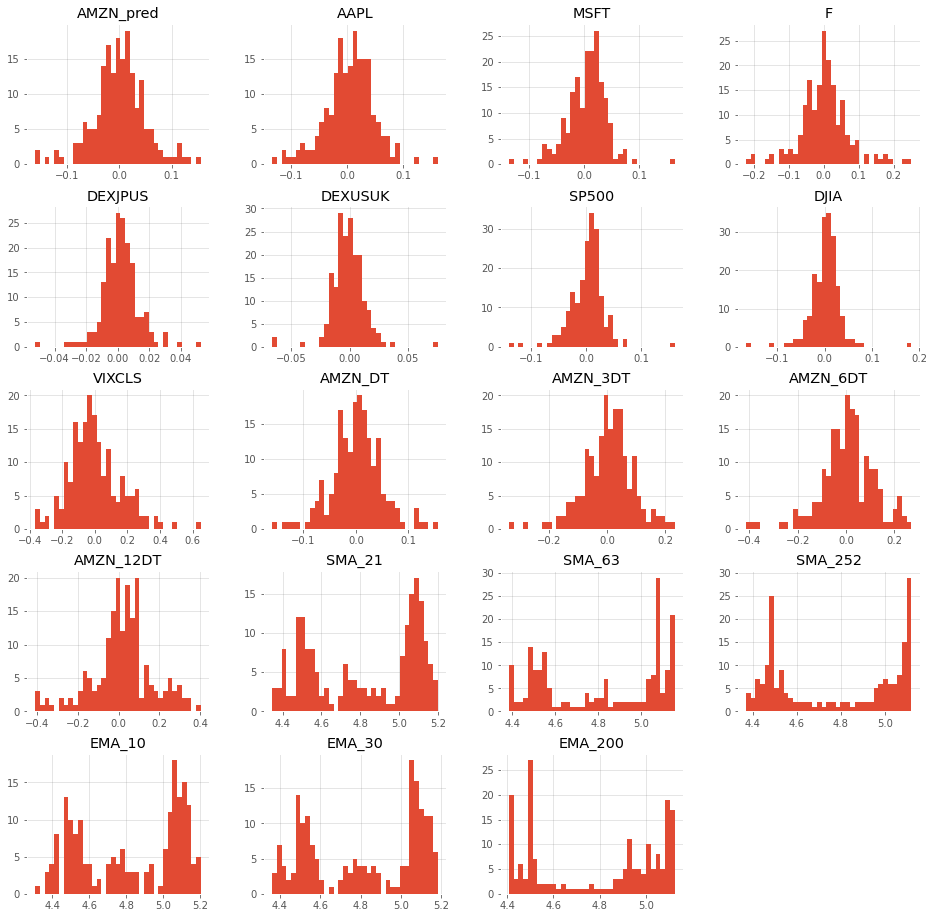

In [19]:
data.hist(bins = 35,
          sharex = False,
          sharey = False,
          figsize = (16, 16)
         )
plt.show()

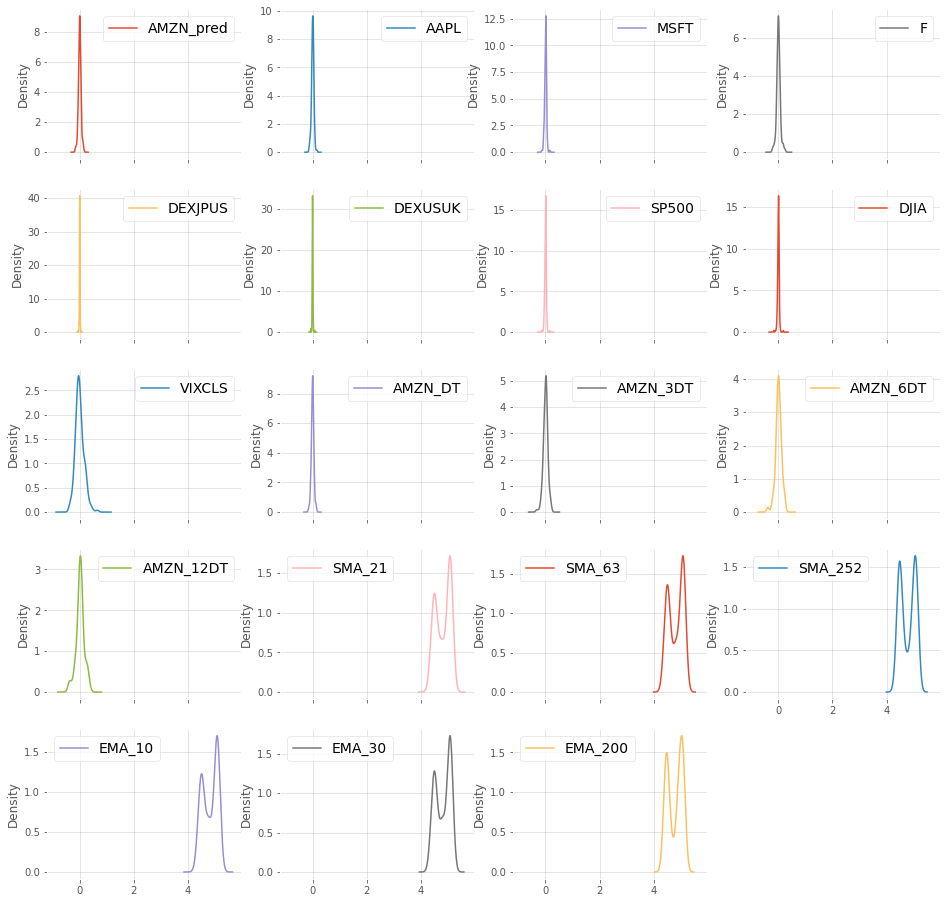

In [20]:
data.plot(kind = "density",
          subplots = True,
          layout = (5,4),
          sharex = True,
          legend = True,
          figsize = (16, 16)
         )
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

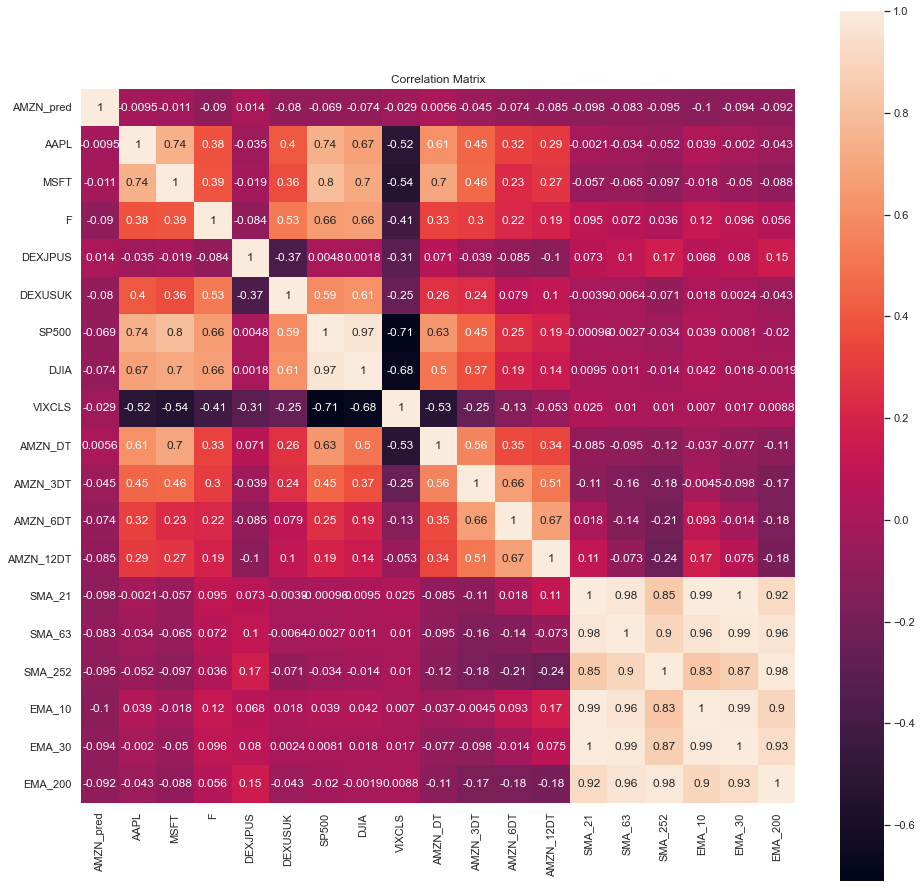

In [21]:
sns.set_theme(style = "white")

correlation = data.corr()

plt.figure(figsize = (16, 16)
          )

plt.title("Correlation Matrix")

sns.heatmap(correlation,
            vmax = 1,
            square = True,
            annot = True,
            cmap = "rocket")

### Setting the model criteria and visualising the results

In [22]:
validation_size = 0.25

train_size = int(len(X) * (1 - validation_size)
                 )

X_train, X_test = X[0:train_size], X[train_size:len(X)]

Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [23]:
models = []

In [24]:
models.append(("LR", LinearRegression()
              )
             )

models.append(("LASSO", Lasso()
              )
             )
    
models.append(("EN", ElasticNet()
              )
             )

models.append(("CART", DecisionTreeRegressor()
              )
             )

models.append(("KNN", KNeighborsRegressor()
              )
             )

models.append(("SVR", SVR()
              )
             )

In [25]:
# Bagging

models.append(("ETR", ExtraTreesRegressor()
              )
             )

models.append(("RFR", RandomForestRegressor()
              )
             )

# Boosting

models.append(("GBR", GradientBoostingRegressor()
              )
             )

models.append(("ABR", AdaBoostRegressor()
              )
             )

In [26]:
import warnings

In [27]:
warnings.filterwarnings("ignore")

# warnings.filterwarnings(action = "once")

In [28]:
num_folds = 10 ## how many times to split the data
seed = 7 ## how many times to shuffle the data randomly before splitting into k folds. 
scoring = "neg_mean_squared_error" ## for the cv score to evaluate each fold on this metric

In [29]:
names = []

kfold_results = []

train_results = []
test_results = []

for name, model in models:
    names.append(name)
    
    # Let's run K-Fold analysis
    
    kfold = KFold(n_splits = num_folds,
                  random_state = seed,
                  shuffle = True)
    
    # Let's convert MSE to positive (HERE, the lower the better)
    
    cv_results = -1 * cross_val_score(model, X_train, Y_train,
                                      cv = kfold,
                                      scoring = scoring)
    
    kfold_results.append(cv_results) # REMEMBER TO ADD THIS
    
    # Entire training period
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Results for test
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    message = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(message)

LR: 0.002182 (0.001208) 0.001484 0.005086
LASSO: 0.001719 (0.000938) 0.001696 0.004782
EN: 0.001719 (0.000938) 0.001696 0.004782
CART: 0.004046 (0.001867) 0.000000 0.006367
KNN: 0.001875 (0.000894) 0.001334 0.004844
SVR: 0.002149 (0.000689) 0.002095 0.006029
ETR: 0.002103 (0.001025) 0.000000 0.005092
RFR: 0.002144 (0.001182) 0.000287 0.004848
GBR: 0.002105 (0.001099) 0.000070 0.005713
ABR: 0.002054 (0.001010) 0.000656 0.004987


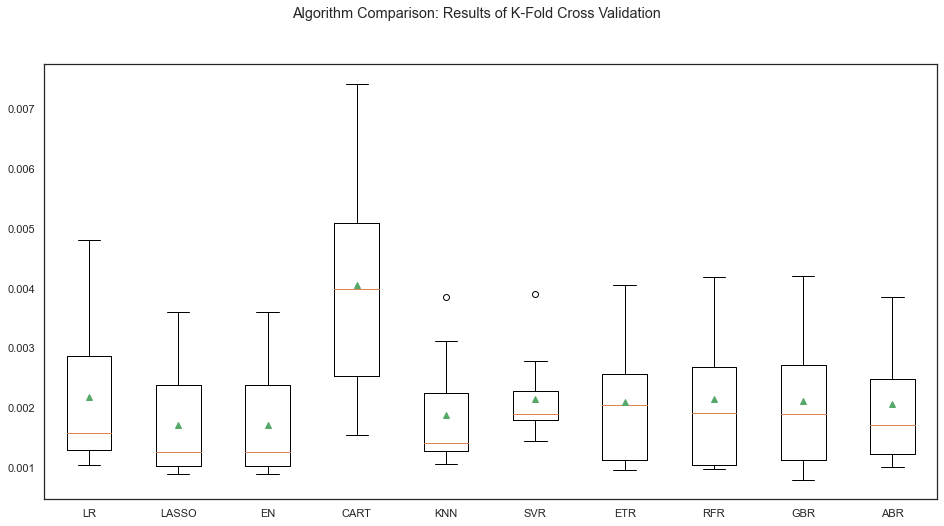

In [30]:
## giving the distribution for each algorithm after performing kcross validation for each algo in each fold. 
fig = plt.figure(figsize = (16, 8)
                 )

fig.suptitle("Algorithm Comparison: Results of K-Fold Cross Validation")

ax = fig.add_subplot(111)

plt.boxplot(kfold_results,showmeans=True)

ax.set_xticklabels(names)

plt.show()
## orange line is median
## green arrow is the mean of the distribution. 
## except for KNN,ETR and RFR, others look reasonable symmetric as the mean and median are approx close. 
## large amount variation in CART results as compared others which shows less variation
## different position shows difference in opinion. only CART is holding that difference. others are on same level. 

## Arima Model

In [31]:
X_train_ARIMA = X_train.loc[:, ["AAPL", "MSFT", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS", 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'SMA_21',
       'SMA_63', 'SMA_252', 'EMA_10', 'EMA_30', 'EMA_200']
                            ]

X_test_ARIMA = X_test.loc[:, ["AAPL", "MSFT", "F", "DEXJPUS", "DEXUSUK", "SP500", "DJIA", "VIXCLS", 'AMZN_DT', 'AMZN_3DT', 'AMZN_6DT', 'AMZN_12DT', 'SMA_21',
       'SMA_63', 'SMA_252', 'EMA_10', 'EMA_30', 'EMA_200']
                          ]

train_len = len(X_train_ARIMA)
test_len = len(X_test_ARIMA)
total_len = len(X)

In [32]:
modelARIMA = stats.ARIMA(endog= Y_train, exog = X_train_ARIMA, order = [1, 0, 0]
                         )

model_fit = modelARIMA.fit()

In [33]:
error_Training_ARIMA = mean_squared_error(Y_train,
                                          model_fit.fittedvalues)

predicted = model_fit.predict(start = train_len -1, 
                              end = total_len - 1, 
                              exog = X_test_ARIMA)[1:]

error_Test_ARIMA = mean_squared_error(Y_test,
                                      predicted)

error_Test_ARIMA

0.005086780752227768

In [34]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA")

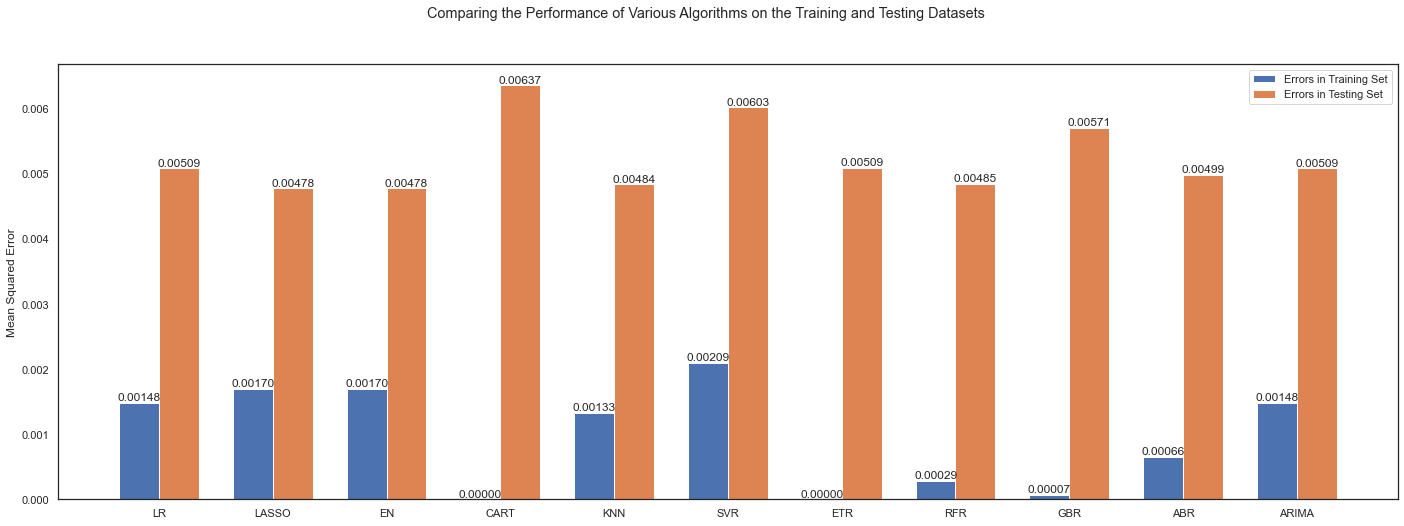

In [35]:
fig = plt.figure(figsize = (24, 8)
                 )

ind = np.arange(len(names)
               ) 
width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

bar1 = plt.bar(ind - width/2, 
        train_results, 
        width = width,
        label = "Errors in Training Set")

bar2 = plt.bar(ind + width/2, 
        test_results, 
        width = width,
        label = "Errors in Testing Set")

ax.bar_label(bar1, fmt='%.5f')
ax.bar_label(bar2, fmt='%.5f')

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

In [36]:
## checking visual accuracy using ratios
## lower the better
train_results_pd1 = pd.DataFrame(train_results)
test_results_pd1 = pd.DataFrame(test_results)
per_MSE1 = (test_results_pd1 - train_results_pd1)/train_results_pd1
per_MSE1 = pd.DataFrame(per_MSE1)
per_MSE1.columns = ['Relative Error of Testing to Training Set']
per_MSE1['Names'] = names
per_MSE1 = per_MSE1.set_index('Names')
per_MSE1

,Relative Error of Testing to Training Set
Names,
LR,2.426947e+00
LASSO,1.819030e+00
EN,1.819030e+00
CART,inf
KNN,2.632022e+00
SVR,1.878132e+00
ETR,4.803858e+30
RFR,1.589810e+01
GBR,8.048742e+01


In [37]:
per_MSE1[per_MSE1['Relative Error of Testing to Training Set'] == per_MSE1['Relative Error of Testing to Training Set'].\
         min()]

,Relative Error of Testing to Training Set
Names,
LASSO,1.81903
EN,1.81903


In [142]:
EN_model=ElasticNet()
EN_model.fit(X_train,Y_train)
EN_model.predict(X_test)
y_EN_growth=np.exp(EN_model.predict(X_test)).cumprod()
y_EN_growth=pd.DataFrame(y_EN_growth)

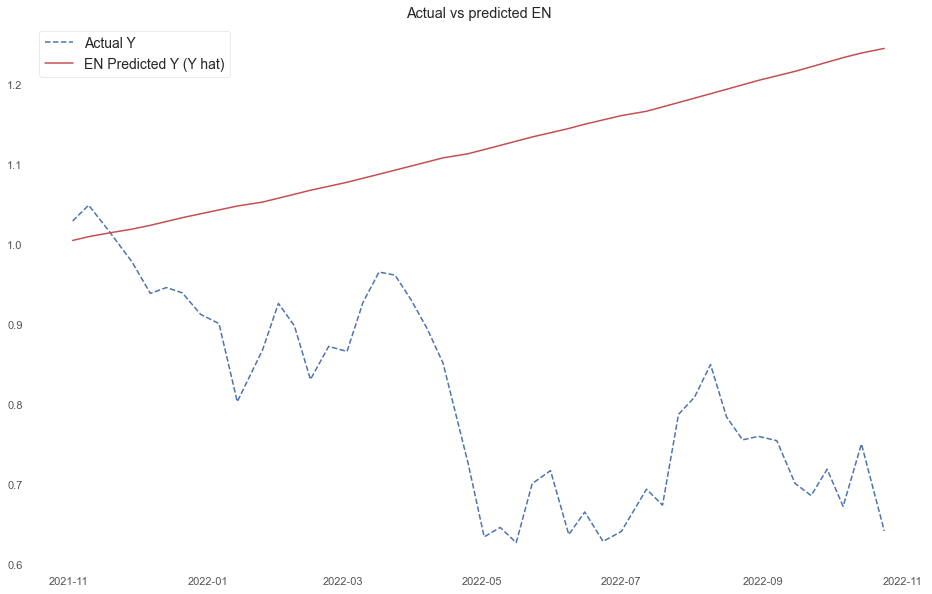

In [143]:
plt.figure(figsize = (16, 10)
           )
plt.grid()
y_EN_growth.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(y_EN_growth, "r", label = "EN Predicted Y (Y hat)")
plt.title("Actual vs predicted EN")
plt.legend()

plt.show()

In [38]:
svm_model=SVR()
svm_model.fit(X_train,Y_train)
svm_model.predict(X_test)
y_svm_growth=np.exp(svm_model.predict(X_test)).cumprod()
y_svm_growth=pd.DataFrame(y_svm_growth)

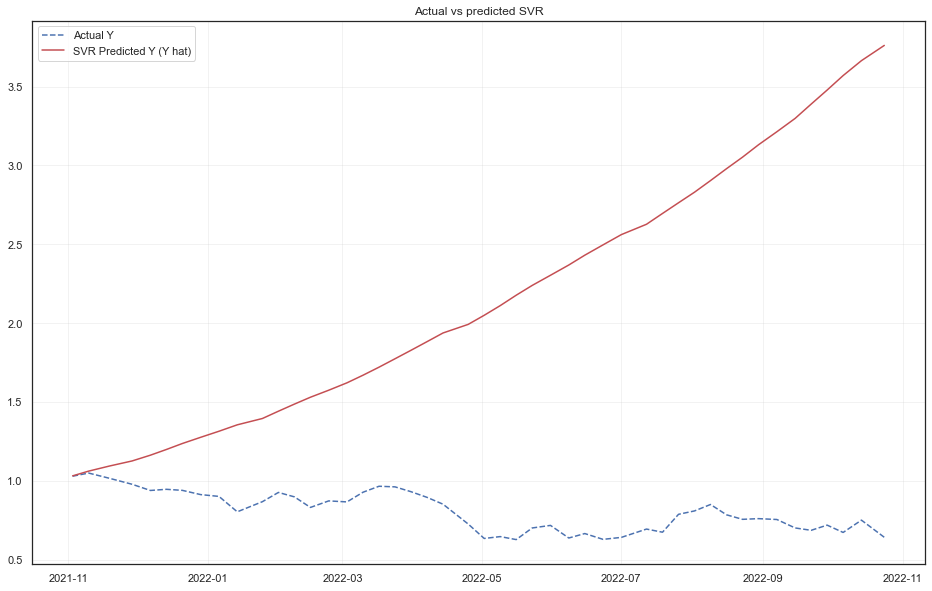

In [39]:
plt.figure(figsize = (16, 10)
           )
plt.grid()
y_svm_growth.index = Y_test.index

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(y_svm_growth, "r", label = "SVR Predicted Y (Y hat)")
plt.title("Actual vs predicted SVR")
plt.legend()

plt.show()

# <font color = 'red'> Hyperparameter tuning: ARIMA, LASSO, EN, SVM </font>

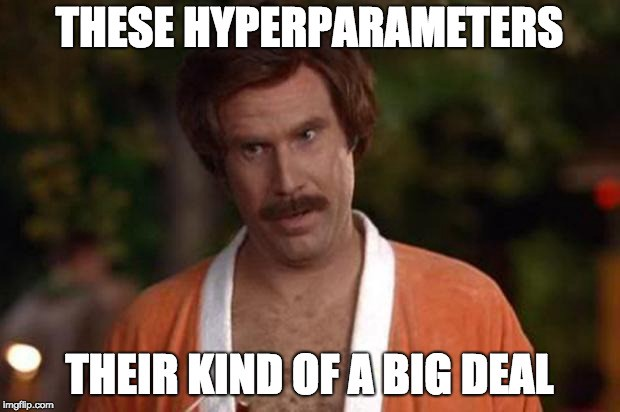

In [40]:
# Hyperparameter Tuning; Grid Search for ARIMA

def assess_ARIMA_model(arima_order):
    
    modelARIMA = stats.ARIMA(endog = Y_train, 
                             exog = X_train_ARIMA,
                             order = arima_order)
    
    model_fit = modelARIMA.fit()
    
    error = mean_squared_error(Y_train,
                               model_fit.fittedvalues)
    
    return error

def assess_models(p_values, d_values, q_values):
    
    best_score, best_cfg = float("inf"), None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    mse = assess_ARIMA_model(order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    
                    print("ARIMA%s MSE = %.7f" % (order, mse)
                          )
                    
                except:
                    continue
    print("Best ARIMA%s MSE = %.7f" % (best_cfg, best_score)
          )
    
# parameters to use for assessment

p_values = range(0, 4)
d_values = range(0, 2)
q_values = range(0, 5)

In [41]:
assess_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE = 0.0014842
ARIMA(0, 0, 1) MSE = 0.0014835
ARIMA(0, 0, 2) MSE = 0.0014828
ARIMA(0, 0, 3) MSE = 0.0014759
ARIMA(0, 0, 4) MSE = 0.0014740
ARIMA(0, 1, 0) MSE = 0.0602305
ARIMA(0, 1, 1) MSE = 0.0125639
ARIMA(0, 1, 2) MSE = 0.0124810
ARIMA(0, 1, 3) MSE = 0.0130710
ARIMA(0, 1, 4) MSE = 0.0076154
ARIMA(1, 0, 0) MSE = 0.0014839
ARIMA(1, 0, 1) MSE = 0.0014842
ARIMA(1, 0, 2) MSE = 0.0014771
ARIMA(1, 0, 3) MSE = 0.0014483
ARIMA(1, 0, 4) MSE = 0.0014727
ARIMA(1, 1, 0) MSE = 0.0331727
ARIMA(1, 1, 1) MSE = 0.0218371
ARIMA(1, 1, 2) MSE = 0.0110522
ARIMA(1, 1, 3) MSE = 0.0122854
ARIMA(1, 1, 4) MSE = 0.0057597
ARIMA(2, 0, 0) MSE = 0.0014828
ARIMA(2, 0, 1) MSE = 0.0014842
ARIMA(2, 0, 2) MSE = 0.0014779
ARIMA(2, 0, 3) MSE = 0.0014710
ARIMA(2, 0, 4) MSE = 0.0014750
ARIMA(2, 1, 0) MSE = 0.0300014
ARIMA(2, 1, 1) MSE = 0.0168539
ARIMA(2, 1, 2) MSE = 0.0142335
ARIMA(2, 1, 3) MSE = 0.0132566
ARIMA(2, 1, 4) MSE = 0.0131345
ARIMA(3, 0, 0) MSE = 0.0014696
ARIMA(3, 0, 1) MSE = 0.0014696
ARIMA(3,

In [42]:
ARIMA_Tuned = stats.ARIMA(endog = Y_train,
                          exog = X_train_ARIMA,
                          order = [3, 0, 2]
                          )

ARIMA_Fit_Tuned = ARIMA_Tuned.fit()

In [43]:
Predicted_Tuned = model_fit.predict(start = train_len - 1, 
                                    end = total_len - 1,
                                    exog = X_test_ARIMA)[1:]

In [44]:
print(mean_squared_error(Y_test,
                         Predicted_Tuned)
     )

0.005086780752227768


In [45]:
# plt.figure(figsize = (16, 10)
#            )
# plt.grid()
# Predicted_Tuned.index = Y_test.index

# plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

# plt.plot(np.exp(Predicted_Tuned).cumprod(), "r", label = "Predicted Y (Y hat)")

# plt.show()

In [46]:
error_Training_ARIMA_Tuned = mean_squared_error(Y_train,
                                          ARIMA_Fit_Tuned.fittedvalues)

error_Test_ARIMA_Tuned = mean_squared_error(Y_test,
                                      Predicted_Tuned)

In [47]:
test_results.append(error_Test_ARIMA)

train_results.append(error_Training_ARIMA)

names.append("ARIMA_Tuned")

# LASSO tuning

In [48]:
model1 = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=3)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model1, grid, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, Y_train)
# summarize
print('Config: %s' % results.best_params_)

Config: {'alpha': 0.01}


In [49]:
lasso_tuned=Lasso(0.01)
lasso_tuned_fit=lasso_tuned.fit(X_train,Y_train)

In [50]:
y_pred2=lasso_tuned_fit.predict(X_test)
error_test_lasso=mean_squared_error(Y_test,y_pred2)
error_test_lasso

0.004782171429588021

In [51]:
y_pred_usingtrainLasso=lasso_tuned_fit.predict(X_train)
error_train_Lasso=mean_squared_error(Y_train,y_pred_usingtrainLasso)
error_train_Lasso

0.0016963889539194869

In [52]:
test_results.append(error_test_lasso)

train_results.append(error_train_Lasso)

names.append("Lasso_Tuned")

# Support Vector Regression Tuning

In [53]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid

{'C': [0.1, 1, 10, 100],
 'gamma': [1, 0.1, 0.01, 0.001],
 'kernel': ['rbf', 'poly', 'sigmoid']}

In [54]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [55]:
print(grid.best_estimator_)

SVR(C=1, gamma=0.01, kernel='sigmoid')


In [56]:
SVR_tuned=SVR(kernel='sigmoid',gamma=0.01,C=1)
# SVR(C=1, gamma=0.01, kernel='sigmoid')
SVR_tuned_fit=SVR_tuned.fit(X_train,Y_train)
SVR_tuned_fit

SVR(C=1, gamma=0.01, kernel='sigmoid')

In [57]:
y_pred=SVR_tuned_fit.predict(X_test)

In [58]:
error_test_SVRT=mean_squared_error(Y_test,y_pred)
error_test_SVRT

0.005353613148998277

In [59]:
y_pred_usingtrainSVR =SVR_tuned_fit.predict(X_train)
error_train_SVRT =mean_squared_error(Y_train,y_pred_usingtrainSVR)
error_train_SVRT

0.0019080812191693856

In [60]:
test_results.append(error_test_SVRT)

train_results.append(error_train_SVRT)

names.append("SVR_Tuned")

# Elastic Net tuning

In [61]:
parametersGrid = {"max_iter": [10, 50, 100],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
eNet = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid2 = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=cv)
grid2.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [10, 50, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print(grid2.best_estimator_)

ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=10)


In [63]:
EN_tuned=ElasticNet(alpha=0.01,l1_ratio=0.2,max_iter=10)
EN_tuned_fit=EN_tuned.fit(X_train,Y_train)
EN_tuned_fit


ElasticNet(alpha=0.01, l1_ratio=0.2, max_iter=10)

In [64]:
y_pred3=EN_tuned_fit.predict(X_test)
error_test_EN=mean_squared_error(Y_test,y_pred3)
error_test_EN

0.004782171429588021

In [65]:
y_pred_usingtrain=EN_tuned_fit.predict(X_train)
error_train_EN=mean_squared_error(Y_train,y_pred_usingtrain)
error_train_EN

0.0016963889539194869

In [66]:
test_results.append(error_test_EN)

train_results.append(error_train_EN)

names.append("EN_Tuned")

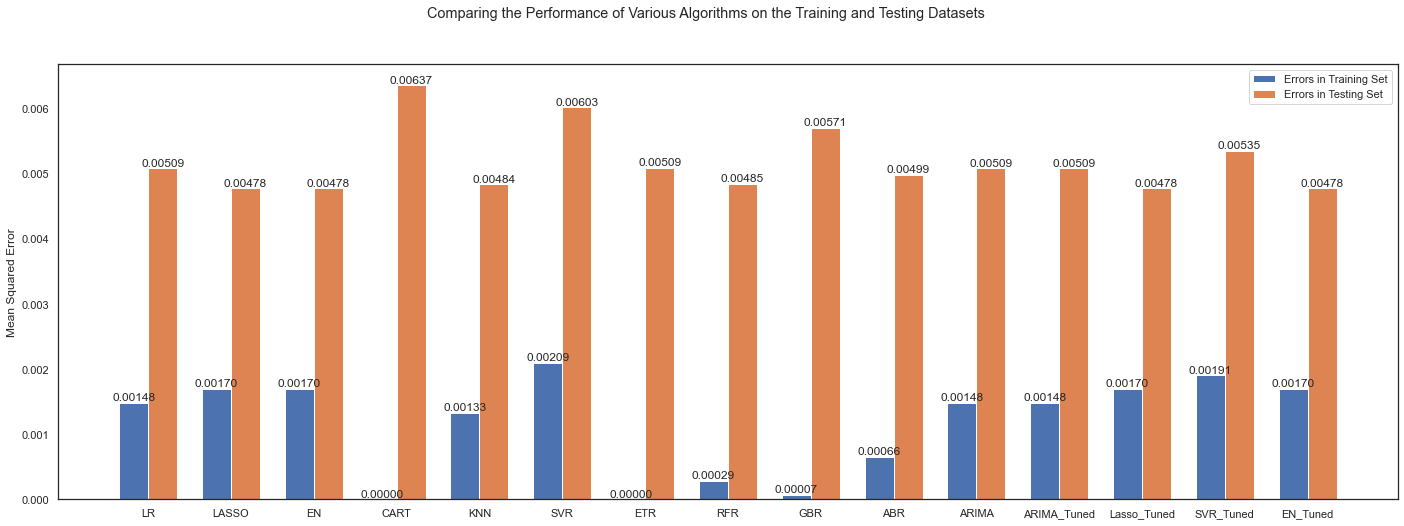

In [67]:
fig = plt.figure(figsize = (24, 8)
                 )

ind = np.arange(len(names)
               ) 
width = 0.35

fig.suptitle("Comparing the Performance of Various Algorithms on the Training and Testing Datasets")
ax = fig.add_subplot(111)

bar1 = plt.bar(ind - width/2, 
        train_results, 
        width = width,
        label = "Errors in Training Set")

bar2 = plt.bar(ind + width/2, 
        test_results, 
        width = width,
        label = "Errors in Testing Set")

ax.bar_label(bar1, fmt='%.5f')
ax.bar_label(bar2, fmt='%.5f')

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error")

plt.show()

In [68]:
#######
train_results_pd = pd.DataFrame(train_results)
test_results_pd = pd.DataFrame(test_results)
per_MSE = (test_results_pd - train_results_pd)/train_results_pd
per_MSE = pd.DataFrame(per_MSE)
per_MSE.columns = ['Relative Error of Testing to Training Set']
per_MSE['Names'] = names
per_MSE = per_MSE.set_index('Names')
per_MSE

,Relative Error of Testing to Training Set
Names,
LR,2.426947e+00
LASSO,1.819030e+00
EN,1.819030e+00
CART,inf
KNN,2.632022e+00
SVR,1.878132e+00
ETR,4.803858e+30
RFR,1.589810e+01
GBR,8.048742e+01


### <font color = red> Answer 1 is presented in the cell below: </font>

In [69]:
per_MSE[per_MSE['Relative Error of Testing to Training Set'] == per_MSE['Relative Error of Testing to Training Set'].min()]

,Relative Error of Testing to Training Set
Names,
SVR_Tuned,1.805757


![display image](https://i.imgflip.com/6x6u5v.jpg)

 ###   Step 6. Using the model of your choice, please visualize the actual vs. predicted (estimated) data.

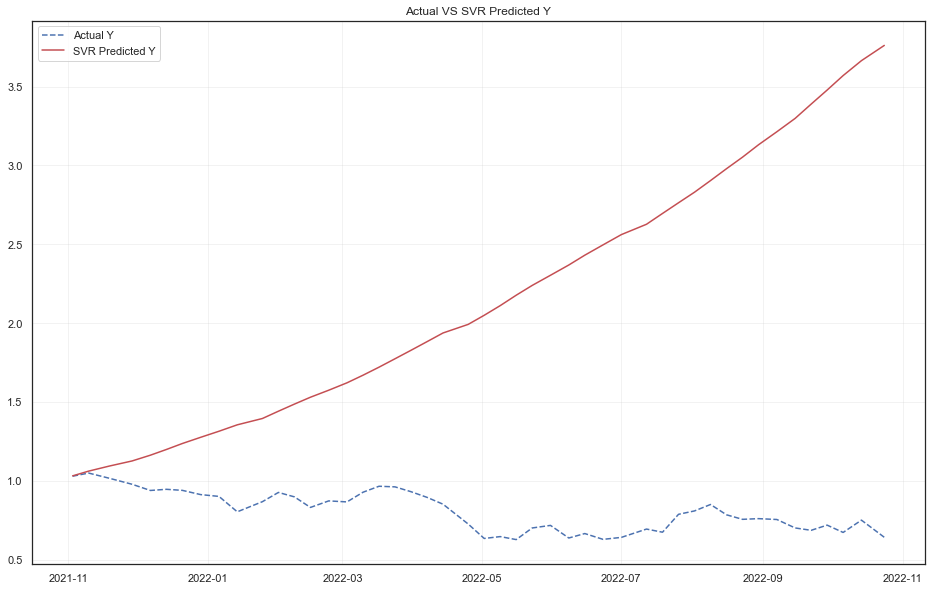

In [70]:
SVR_Y_hat = (SVR().fit(X_train, Y_train)).predict(X_test)
SVR_Y_hat = pd.DataFrame(SVR_Y_hat, index = Y_test.index)

plt.figure(figsize = (16, 10)
           )
plt.grid()

plt.plot(np.exp(Y_test).cumprod(), "b--", label = "Actual Y")

plt.plot(np.exp(SVR_Y_hat).cumprod(), "r", label = "SVR Predicted Y")
plt.title("Actual VS SVR Predicted Y")
plt.legend()
plt.show()

## <font color = blue> 👉 Questions 2 to 5 ask you to build, execute, and backtest a trend-following (momentum-based) strategy, using `Relative Strength Index` (`RSI`). </font>

#### The Relative Strength Index (RSI) is an indicator that uses the closing prices of an asset to identify oversold and overbought conditions. 

> Most commonly, RSI is calculated using a 14-day period, and measured on a scale from zero to 100. (It is an oscillator.)

> Traders usually buy an asset when it is oversold (when its RSI is below 30) and sell when it is overbought (when its RSI is above 70). 

> More extreme overbought and oversold levels, such as 80 and 20, are used less frequently, and imply stronger momentum.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Apple (`AAPL`) as our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position if RSI crosses the lower threshold (standard value of 30), moving upwards. Exit the position when RSI becomes higher than the middle level (value of 50).
<br>

- Enter a short position if RSI crosses the upper threshold (standard value of 70), moving downwards. Exit the position when RSI becomes less than 50.
<br>

- Only one position can be open at a time.

### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value to calculate the next average value 
    by multiplying by our lookback period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [71]:
pd.set_option('display.max_rows',50)

In [72]:
def RSIPlot(RSIdf,Overbought,Oversold,Closing):
    
    RSIdf[["Hodling Returns", "Strategy Cumulative Returns"]].dropna().plot(figsize=(16,8)) 
    plt.ylabel("Cumulative Returns") 
    plt.title("RSI Strategy vs Hodling Returns")
    
    plt.figure(figsize=(15,6))
    plt.plot(RSIdf.index, RSIdf['RSI'],color='black', alpha = 0.3)
    plt.axhline(Overbought ,color = 'red')
    plt.axhline(Oversold ,color='green')
    plt.axhline(Closing , linestyle = "dotted", color = 'black')
    plt.scatter(RSIdf[RSIdf['Signal'] == 1].index , RSIdf[RSIdf['Signal'] == 1]["RSI"],marker = '^', color = 'green', label = 'Long Signal')
    plt.scatter(RSIdf[RSIdf['Signal'] == -1].index , RSIdf[RSIdf['Signal'] == -1]["RSI"],marker = 'v', color = 'red', label = 'Short Signal')
    plt.title('RSI')
    plt.legend(loc='upper left')
    plt.show()

    plt.figure(figsize=(15,6))
    plt.plot(RSIdf.index, RSIdf['RSI'],label='RSI',color='black', alpha = 0.3)
    plt.axhline(Overbought ,color = 'red')
    plt.axhline(Oversold ,color='green')
    plt.axhline(Closing ,linestyle = "dotted", color = 'black')
    plt.scatter(RSIdf[RSIdf['Execution'] == 1].index , RSIdf[RSIdf['Execution'] == 1]["RSI"],marker = '*', color = 'Purple', label = 'Execution')
    plt.scatter(RSIdf[RSIdf['Closing'] == 1].index , RSIdf[RSIdf['Closing'] == 1]["RSI"],marker = 'D', color = 'Orange', label = 'Closing')
    plt.title('RSI')
    plt.legend(loc='upper left')
    plt.show()

In [73]:
def RSIBacktester(Ticker, Start = '2015-01-01', End = '2017-12-31', Overbought = 70, Oversold = 30, Closing = 50, Capital = 100000, Trading_Fee = 5):
    
    ## PARSE STOCK DATA FROM YAHOO FINANCE
    RSIdf = yf.download(Ticker ,start = Start, end = End)
    RSIdf = pd.DataFrame(RSIdf['Adj Close'])
    
    ## RSI CALCULATION
    RSIdf['Daily Change'] = RSIdf['Adj Close'].diff()

    RSIperiod = 14 ## lookback window

    RSIdf['Up']= [x if x > 0 else 0 for x in RSIdf['Daily Change']]
    RSIdf['Down']= [abs(x) if x < 0 else 0 for x in RSIdf['Daily Change']]
    
    RSIdf['Up']= RSIdf['Up'].ewm(span = RSIperiod, min_periods = RSIperiod - 1).mean()
    RSIdf['Down']= RSIdf['Down'].ewm(span = RSIperiod, min_periods = RSIperiod - 1).mean()
    
    #.ewm Variation from PyDay: .ewm(com = RSIperiod - 1, adjust = False).mean()
    #com Param Specifies decay in terms of center of mass
    #Alpha = 1/(1 + Com) for Com >= 0 -> This is different from Span's Alpha = 2/(1 + Com) for Span >= 1
    #adjust = False Param calculates the exponentially weighted function recursively:
    #Yt = (1 - Alpha)*Yt-1 + Alpha*Xt
    
    RSIdf['RS']= RSIdf['Up']/RSIdf['Down']
    RSIdf['RSI']=100-(100/( 1 + RSIdf['RS']))
    
    ## SETUP/RESET NECESSARY COLUMNS FOR STRATEGY EXECUTION
    RSIdf['Yesterday RSI'] = RSIdf['RSI'].shift(1)
    RSIdf["Signal"] = 0
    RSIdf["Position"] = 0
    RSIdf["Execution"] = 0
    RSIdf["Closing"] = 0
    RSIdf["Capital"] = Capital
    RSIdf["Cash"] = Capital
    RSIdf["Stock_Holding"] = 0
    RSIdf["Daily_Stock_Value"] = 0

    for i in range(len(RSIdf)): 
        
        ##SIGNAL GENERATION
        if RSIdf["Yesterday RSI"][i] < Oversold and RSIdf['RSI'][i] > Oversold and  RSIdf['RSI'][i] < Closing and RSIdf["RSI"][i] > RSIdf["Yesterday RSI"][i]: 
            RSIdf["Signal"][i] = 1  
        elif RSIdf["Yesterday RSI"][i] > Overbought and RSIdf['RSI'][i] < Overbought and  RSIdf['RSI'][i] > Closing and RSIdf["RSI"][i] < RSIdf["Yesterday RSI"][i]: 
            RSIdf["Signal"][i] = -1  
        else: 
            RSIdf["Signal"][i] = 0

        ##SIGNAL EXECUTION CHECK
        if RSIdf["Position"][i] == 0 and abs(RSIdf['Signal'])[i] == 1: #Execute Signals only when Position = 0 
            RSIdf["Position"][i:] = RSIdf['Signal'][i]

            if RSIdf["Position"][i] == 1: #Execute Long Trade
                RSIdf["Stock_Holding"][i:] = int(0.8 * ((RSIdf["Cash"][i]- Trading_Fee)/RSIdf["Adj Close"][i]))
                RSIdf["Daily_Stock_Value"][i:] = RSIdf["Adj Close"][i] * RSIdf["Stock_Holding"][i]
                RSIdf["Cash"][i:] = RSIdf["Cash"][i] - RSIdf["Daily_Stock_Value"][i] - Trading_Fee
                RSIdf["Capital"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i]
                RSIdf["Execution"][i] = 1

            elif RSIdf["Position"][i] == -1: #Execute Short Trade
                RSIdf["Stock_Holding"][i:] = -int(0.8 * ((RSIdf["Cash"][i]- Trading_Fee)/RSIdf["Adj Close"][i]))
                RSIdf["Daily_Stock_Value"][i:] = RSIdf["Adj Close"][i] * RSIdf["Stock_Holding"][i]
                RSIdf["Cash"][i:] = RSIdf["Cash"][i] + abs(RSIdf["Daily_Stock_Value"][i]) - Trading_Fee
                RSIdf["Capital"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i]
                RSIdf["Execution"][i] = 1
        else:
            RSIdf["Daily_Stock_Value"][i:] = RSIdf["Adj Close"][i] * RSIdf["Stock_Holding"][i]
            RSIdf["Capital"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i]

        ##TRADE CLOSING CHECK
        if RSIdf["Position"][i] == 1 and RSIdf['RSI'][i] > 50: #Close Long Position
            RSIdf["Cash"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i] - Trading_Fee
            RSIdf["Daily_Stock_Value"][i:] = 0
            RSIdf["Stock_Holding"][i:] = 0
            RSIdf["Position"][i:] = 0
            RSIdf["Capital"][i:] = RSIdf["Cash"][i] 
            RSIdf["Closing"][i] = 1

        elif RSIdf["Position"][i] == -1 and RSIdf['RSI'][i] < 50: #Close Short Position
            RSIdf["Cash"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i] - Trading_Fee
            RSIdf["Daily_Stock_Value"][i:] = 0
            RSIdf["Stock_Holding"][i:] = 0
            RSIdf["Position"][i:] = 0
            RSIdf["Capital"][i:] = RSIdf["Cash"][i] 
            RSIdf["Closing"][i] = 1
        else: 
            RSIdf["Daily_Stock_Value"][i:] = RSIdf["Adj Close"][i] * RSIdf["Stock_Holding"][i]
            RSIdf["Capital"][i:] = RSIdf["Cash"][i] + RSIdf["Daily_Stock_Value"][i]
    
    RSIdf['Return'] = np.log(RSIdf['Capital']/RSIdf['Capital'].shift(1))
    RSIdf['Strategy Cumulative Returns'] = np.exp(RSIdf['Return'].cumsum())-1
    RSIdf['Hodling Returns'] = np.exp(np.log(RSIdf['Adj Close']/RSIdf['Adj Close'].shift(1)).cumsum()) - 1
    RSIdf['Max Gross Performance'] = RSIdf['Strategy Cumulative Returns'].cummax()
    RSIdf['Drawdown'] = RSIdf['Max Gross Performance'] - RSIdf["Strategy Cumulative Returns"]
    
    ##PLOT RSI TEST RESULTS
    RSIPlot(RSIdf,Overbought,Oversold,Closing)
    
    return RSIdf

### <font color = red> Answer 2 is presented in the cell below: </font>

[*********************100%***********************]  1 of 1 completed


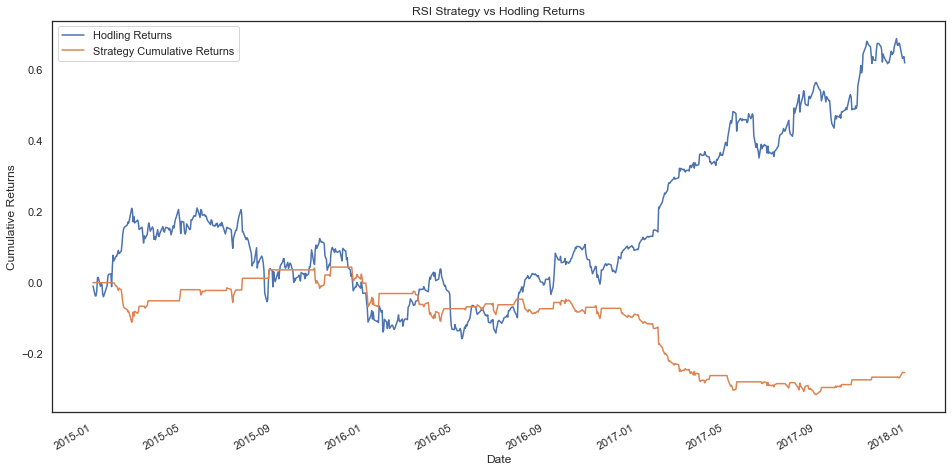

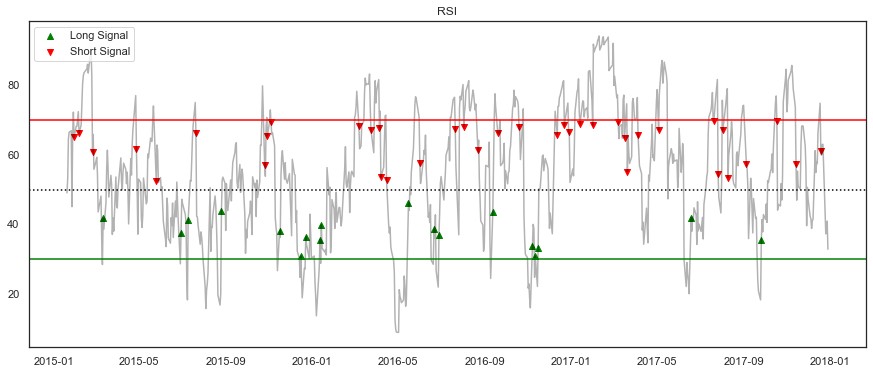

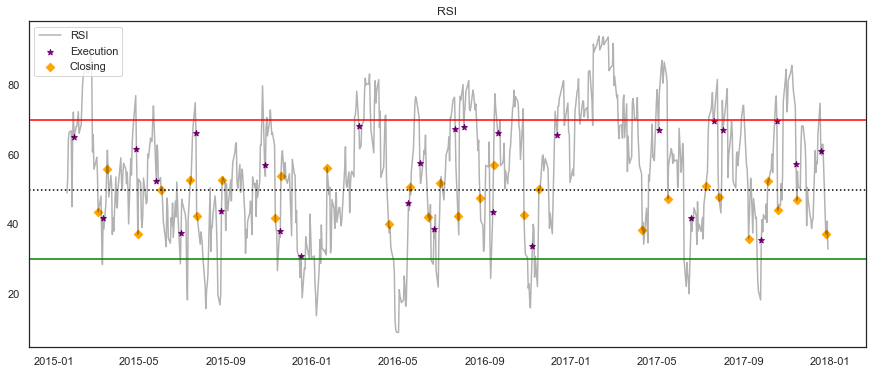

,Adj Close,Daily Change,Up,Down,RS,RSI,Yesterday RSI,Signal,Position,Execution,Closing,Capital,Cash,Stock_Holding,Daily_Stock_Value,Return,Strategy Cumulative Returns,Hodling Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,,,,,,,,,,,,
2014-12-31,24.839493,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000.000000,100000.000000,0,0.000000,NaN,NaN,NaN,NaN,NaN
2015-01-02,24.603207,-0.236286,NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000.000000,100000.000000,0,0.000000,0.000000,0.000000,-0.009513,0.000000,0.000000
2015-01-05,23.910089,-0.693117,NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000.000000,100000.000000,0,0.000000,0.000000,0.000000,-0.037416,0.000000,0.000000
2015-01-06,23.912344,0.002254,NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000.000000,100000.000000,0,0.000000,0.000000,0.000000,-0.037326,0.000000,0.000000
2015-01-07,24.247646,0.335302,NaN,NaN,NaN,NaN,NaN,0,0,0,0,100000.000000,100000.000000,0,0.000000,0.000000,0.000000,-0.023827,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,41.604237,0.000000,0.148037,0.086999,1.701588,62.984735,62.984735,0,-1,0,0,73185.299547,132013.690104,-1414,-58828.390556,0.000000,-0.268147,0.674923,0.043831,0.311978
2017-12-26,40.548740,-1.055496,0.128299,0.216132,0.593612,37.249469,62.984735,0,0,0,1,74672.771196,74672.771196,0,0.000000,0.020121,-0.253272,0.632430,0.043831,0.297103
2017-12-27,40.555878,0.007137,0.112144,0.187315,0.598692,37.448882,37.249469,0,0,0,0,74672.771196,74672.771196,0,0.000000,0.000000,-0.253272,0.632718,0.043831,0.297103


In [74]:
RSIdf = RSIBacktester('AAPL')
RSIdf

In [75]:
RSIdf["Signal"].value_counts()

 0    700
-1     38
 1     18
Name: Signal, dtype: int64

In [76]:
RSIdf["Execution"].value_counts()

0    728
1     28
Name: Execution, dtype: int64

In [77]:
RSIdf["Closing"].value_counts()

0    728
1     28
Name: Closing, dtype: int64

![display image](https://i.gifer.com/fxgy.gif)

## Below is a scenario where we skip signal execution when we already have a position

In [78]:
RSIdf.loc['2015-01-29':'2015-02-28']

,Adj Close,Daily Change,Up,Down,RS,RSI,Yesterday RSI,Signal,Position,Execution,Closing,Capital,Cash,Stock_Holding,Daily_Stock_Value,Return,Strategy Cumulative Returns,Hodling Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,,,,,,,,,,,,
2015-01-29,26.756804,0.807882,0.415097,0.159338,2.605138,72.261814,65.375467,0,0,0,0,100000.000000,100000.000000,0,0.000000,0.000000,0.000000,0.077188,0.0,0.000000
2015-01-30,26.365238,-0.391565,0.356866,0.191915,1.859501,65.028868,72.261814,-1,-1,1,0,99995.000000,179987.132668,-3034,-79992.132668,-0.000050,-0.000050,0.061424,0.0,0.000050
2015-02-02,26.696035,0.330797,0.353235,0.165179,2.138500,68.137646,65.028868,0,-1,0,0,98991.361309,179987.132668,-3034,-80995.771358,-0.010088,-0.010086,0.074742,0.0,0.010086
2015-02-03,26.700546,0.004511,0.304941,0.142304,2.142890,68.182150,68.137646,0,-1,0,0,98977.675301,179987.132668,-3034,-81009.457367,-0.000138,-0.010223,0.074923,0.0,0.010223
2015-02-04,26.905329,0.204782,0.291142,0.122698,2.372838,70.351374,68.182150,0,-1,0,0,98356.365238,179987.132668,-3034,-81630.767429,-0.006297,-0.016436,0.083167,0.0,0.016436
2015-02-05,27.097361,0.192032,0.277547,0.105868,2.621642,72.388212,70.351374,0,-1,0,0,97773.740574,179987.132668,-3034,-82213.392094,-0.005941,-0.022263,0.090898,0.0,0.022263
2015-02-06,26.869175,-0.228186,0.239623,0.122582,1.954800,66.156762,72.388212,-1,-1,0,0,98466.055847,179987.132668,-3034,-81521.076820,0.007056,-0.015339,0.081712,0.0,0.015339
2015-02-09,27.047657,0.178482,0.231296,0.105887,2.184364,68.596553,66.156762,0,-1,0,0,97924.541290,179987.132668,-3034,-82062.591377,-0.005515,-0.020755,0.088897,0.0,0.020755
2015-02-10,27.567282,0.519625,0.270452,0.091507,2.955528,74.718922,68.596553,0,-1,0,0,96347.999920,179987.132668,-3034,-83639.132748,-0.016231,-0.036520,0.109817,0.0,0.036520


### <font color = blue> 👉 Question 3</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

# <font color = 'red'> Return Cumsum calculation </font>

In [79]:
RSIdf.tail(3)

,Adj Close,Daily Change,Up,Down,RS,RSI,Yesterday RSI,Signal,Position,Execution,Closing,Capital,Cash,Stock_Holding,Daily_Stock_Value,Return,Strategy Cumulative Returns,Hodling Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,,,,,,,,,,,,
2017-12-27,40.555878,0.007137,0.112144,0.187315,0.598692,37.448882,37.249469,0,0,0,0,74672.771196,74672.771196,0,0.0,0.0,-0.253272,0.632718,0.043831,0.297103
2017-12-28,40.669979,0.114101,0.112405,0.162339,0.692407,40.912552,37.448882,0,0,0,0,74672.771196,74672.771196,0,0.0,0.0,-0.253272,0.637311,0.043831,0.297103
2017-12-29,40.230179,-0.439800,0.097418,0.199334,0.488715,32.827967,40.912552,0,0,0,0,74672.771196,74672.771196,0,0.0,0.0,-0.253272,0.619605,0.043831,0.297103


### <font color = red> Answer 3 </font>

    The answer is -25.329% .

### <font color = blue> 👉 Question 4</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

### Below are the lines of code that lead to an answer:

In [80]:
def Drawdowns(RSIdf):  
      
    index = RSIdf[RSIdf['Drawdown'] == 0].index  
  
    a = []  
  
    for i in range(1,len(index)):  
        period = index[i].to_pydatetime() - index[i-1].to_pydatetime()  
        max_drawdown = RSIdf.loc[index[i-1]:index[i],'Drawdown'].max()  
        a.append([period,max_drawdown,index[i-1],index[i]])  
      
    df1 = pd.DataFrame(a,columns=['Period','Max Drawdown','Beginning','End']).sort_values('Max Drawdown',ascending=False)  
  
    return df1.head(5)

In [81]:
Drawdowns(RSIdf)

,Period,Max Drawdown,Beginning,End
18,174 days,0.111783,2015-01-29,2015-07-22
85,22 days,0.057646,2015-10-27,2015-11-18
84,4 days,0.000050,2015-10-23,2015-10-27
43,2 days,0.000050,2015-08-25,2015-08-27
0,3 days,0.000000,2015-01-02,2015-01-05


Text(0.5, 1.0, 'Drawdowns')

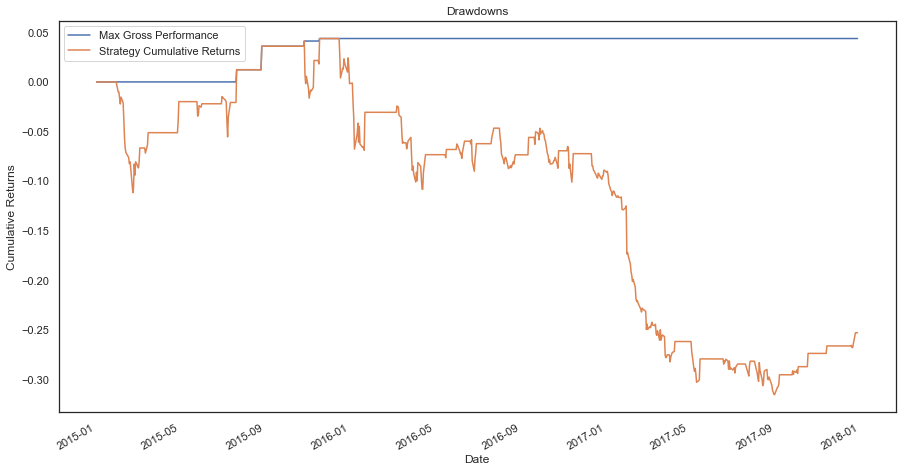

In [82]:
RSIdf[["Max Gross Performance", "Strategy Cumulative Returns"]].dropna().plot(figsize=(15,8)) 
plt.ylabel("Cumulative Returns") 
plt.title("Drawdowns")

## 0.005% Drawdowns?? It's the Trading Fee!

In [83]:
RSIdf.loc['2015-08-25':'2015-08-29']

,Adj Close,Daily Change,Up,Down,RS,RSI,Yesterday RSI,Signal,Position,Execution,Closing,Capital,Cash,Stock_Holding,Daily_Stock_Value,Return,Strategy Cumulative Returns,Hodling Returns,Max Gross Performance,Drawdown
Date,,,,,,,,,,,,,,,,,,,,
2015-08-25,23.641817,0.141294,0.098227,0.394311,0.249110,19.942971,16.759054,0,0,0,0,101233.362627,101233.362627,0,0.000000,0.000000,0.012334,-0.048217,0.012334,0.00000
2015-08-26,24.997793,1.355976,0.265927,0.341736,0.778164,43.762207,19.942971,1,1,1,0,101228.362627,20260.510460,3239,80967.852167,-0.000049,0.012284,0.006373,0.012334,0.00005
2015-08-27,25.733892,0.736099,0.328616,0.296171,1.109548,52.596486,43.762207,0,0,0,1,103607.588076,103607.588076,0,0.000000,0.023232,0.036076,0.036007,0.036076,0.00000
2015-08-28,25.818211,0.084318,0.296043,0.256682,1.153347,53.560673,52.596486,0,0,0,0,103607.588076,103607.588076,0,0.000000,0.000000,0.036076,0.039402,0.036076,0.00000


### <font color = red> Answer 4 </font>

    The Worst drawdown period     : Net drawdown 11.1784 % | Duration 173 Days
    
    The 2nd worst drawdown period : Net drawdown 5.765 % | Duration 22 Days
     
    The 3rd worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
         
    The 4th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days
    
    The 5th worst drawdown period : Net drawdown ____________ % | Duration ____________ Days

### <font color = blue> 👉 Question 5</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [84]:
Avg_Annual_Returns = (np.exp(RSIdf["Return"].groupby(RSIdf.index.year).sum())-1).mean() 
Avg_Annual_Returns

-0.06736874895480804

In [85]:
Annualized_Returns = np.exp(RSIdf["Return"].groupby(RSIdf.index.year).sum())-1 
Annualized_Returns

Date
2014    0.000000
2015   -0.001806
2016   -0.087317
2017   -0.180352
Name: Return, dtype: float64

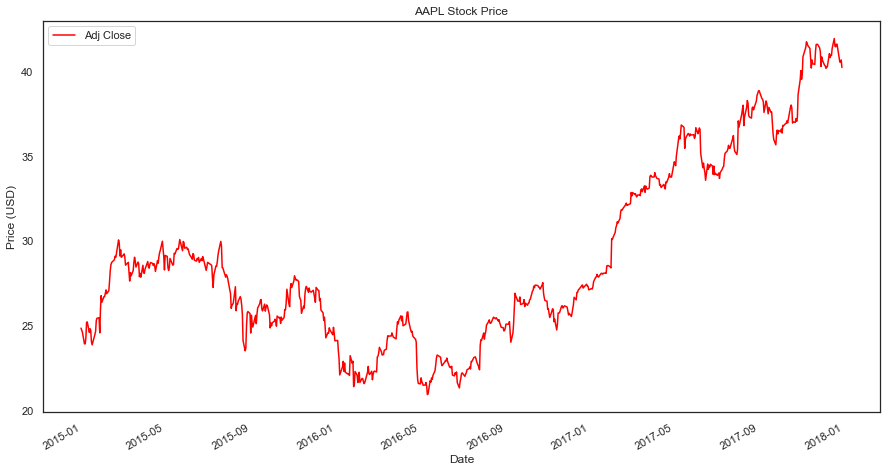

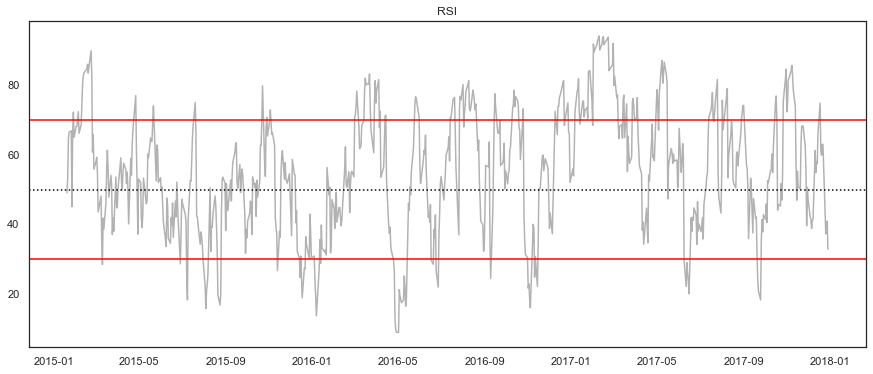

In [86]:
RSIdf[["Adj Close"]].dropna().plot(figsize=(15,8), color = 'red') 
plt.ylabel("Price (USD)") 
plt.title("AAPL Stock Price")

plt.figure(figsize=(15,6))
plt.plot(RSIdf.index, RSIdf['RSI'],color='black', alpha = 0.3)
plt.axhline(70 ,color = 'red')
plt.axhline(30 ,color='red')
plt.axhline(50 , linestyle = "dotted", color = 'black')
plt.title('RSI')
plt.show()

### <font color = red> Answer 5 </font>

    Below average year(s) : 2017 (-18.035%)
    
    Above average year(s) : 2015 (-0.182%) & 2016 (Barely at -8.732%)
     

###  <font color = blue> 👉 Question 6. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

### Take the rows of DataFrame as n days to calculate annualized Sharpe Ratio 

In [87]:
RSIdf.shape[0]

756

In [88]:
def sharpe_ratio(RSIdf, periods_per_year = 252): 
     
    n_years = RSIdf.shape[0]/periods_per_year 
     
    annualized_return = np.power(np.prod(1 + RSIdf['Return']), (1 / n_years) 
                                 ) - 1 
     
    annualized_vol = RSIdf['Return'].std() * np.sqrt(periods_per_year) 
     
    annualized_sharpe = annualized_return / annualized_vol 
     
    return annualized_return, annualized_vol, annualized_sharpe

In [89]:
sharpe_ratio(RSIdf)

(-0.09867307293272298, 0.11414272761918501, -0.8644709565897749)

### <font color = red> Answer 6 </font>
    
    Sharpe ratio: -0.865
    

## 👇 <font color = "purple"> Bigger Question 7. ### 

### This bigger question is where you will execute a principal component analysis (PCA) based portfolio for asset allocation. 
<br>
    
### Go to [the list of SP 500 companies on Wikipedia](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).
    
    Step 1: Among the securities added to the S&P 500 component before January 2000, select the first 30 stocks. 
    
    Step 2: Your objective is to find the portfolio using PCA. Using what you learned in class, 
    identify the profile of each portfolio. 
    
    Step 3: Then backtest the performance of your portfolio, relative to the equal weight portfolio. 
    Here, as you learned in class, use 80% of your data for PCA and 20% for backtesting.
    
### <font color = "green"> NOTE: The investment horizon will be 20 years between 2000 and 2019    

### Below are the lines of code that lead to an answer:

## Importing the necessary libraries

In [90]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

## Activate Necessary Packages

In [91]:
# For unsupervised learning
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD # Singular value decomposition

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA

# For EDA and Data Transformation
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix
import seaborn as sns

In [92]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

warnings.filterwarnings("ignore")

## Import Data

In [93]:
tickers = ["AAPL","MSFT","AMZN","BRK-B","UNH","JNJ","XOM","JPM","PG","NVDA",
           "CVX","HD","LLY","PFE","PEP","MRK","BAC","KO","COST","TMO","WMT",
           "MCD","ABT","DIS","DHR","CSCO","WFC","COP","VZ","BMY"]
# googled the first 30 stocks based on market cap and exist before January 2000

In [94]:
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
SPY_data = yf.download(tickers, interval="1d", start="2000-01-03", end="2020-01-01")

[*********************100%***********************]  30 of 30 completed


In [95]:
SPY_data

Adj Close                                                          \
                 AAPL        ABT       AMZN        BAC        BMY       BRK-B   
Date                                                                            
2000-01-03   0.851942   9.262775   4.468750  13.522103  26.770658   35.299999   
2000-01-04   0.780115   8.998127   4.096875  12.719496  24.745344   34.080002   
2000-01-05   0.791530   8.981582   3.487500  12.859081  24.586815   34.639999   
2000-01-06   0.723033   9.295855   3.278125  13.958302  24.925762   36.080002   
2000-01-07   0.757282   9.395097   3.478125  13.591899  28.575987   36.400002   
...               ...        ...        ...        ...        ...         ...   
2019-12-24  69.623230  83.220901  89.460503  33.078800  57.600082  225.470001   
2019-12-26  71.004585  83.220901  93.438499  33.360561  58.329659  226.449997   
2019-12-27  70.977631  83.335342  93.489998  33.200897  58.493813  226.139999   
2019-12-30  71.398903  82.763237  92.344498  33.013054  58.119904  225.759995   
2019-12-31  71.920563  82.820450  92.391998  33.078800  58.539413  226.500000   

                                                          ...      Volume  \
                  COP        COST       CSCO         CVX  ...        NVDA   
Date                                                      ...               
2000-01-03   8.425842   30.975519  38.369202   18.146921  ...  30091200.0   
2000-01-04   8.263138   29.278831  36.216633   18.146921  ...  30048000.0   
2000-01-05   8.112053   29.779144  36.105675   18.472431  ...  18835200.0   
2000-01-06   8.390981   30.377337  35.506485   19.259069  ...  12048000.0   
2000-01-07   8.390981   32.389423  37.592506   19.598137  ...   7118400.0   
...               ...         ...        ...         ...  ...         ...   
2019-12-24  57.839806  280.277069  43.510857  105.260353  ...  13886400.0   
2019-12-26  58.134949  281.705902  43.574608  105.487778  ...  18285200.0   
2019-12-27  58.117065  280.162750  43.501762  105.225380  ...  25464400.0   
2019-12-30  57.786144  281.143951  43.337845  104.831772  ...  25805600.0   
2019-12-31  58.161777  279.981720  43.674774  105.409073  ...  23100400.0   

                                                                     \
                   PEP         PFE         PG       TMO         UNH   
Date                                                                  
2000-01-03   5298400.0  12873345.0  4275000.0  432200.0   3431200.0   
2000-01-04   4555700.0  14208974.0  4270800.0  568400.0   5997600.0   
2000-01-05   5701900.0  12981591.0  5098400.0  490800.0  10562400.0   
2000-01-06   6863100.0  11115273.0  6524200.0  561900.0  15300000.0   
2000-01-07  10527800.0  17962163.0  9832000.0  266600.0  16160800.0   
...                ...         ...        ...       ...         ...   
2019-12-24   1220600.0   5187683.0  2022100.0  489200.0    714000.0   
2019-12-26   2934700.0   9384078.0  4760400.0  680700.0   1050600.0   
2019-12-27   2554000.0  10117662.0  5192000.0  628800.0   1547100.0   
2019-12-30   3024700.0  11554264.0  3884300.0  606600.0   1511700.0   
2019-12-31   3229400.0  15175703.0  4798900.0  875800.0   2224200.0   

                                                          
                   VZ         WFC        WMT         XOM  
Date                                                      
2000-01-03  4663843.0   9037000.0  8369900.0  13458200.0  
2000-01-04  5005878.0  15237200.0  6745100.0  14510800.0  
2000-01-05  6368681.0   8228200.0  7018700.0  17485000.0  
2000-01-06  4705763.0   8326800.0  6544500.0  19461600.0  
2000-01-07  5043907.0   7711200.0  7976900.0  16603800.0  
...               ...         ...        ...         ...  
2019-12-24  6640100.0   4635500.0  2227400.0   3979400.0  
2019-12-26  8117800.0  12517100.0  4223800.0   8840200.0  
2019-12-27  8166800.0   9892000.0  3544000.0  10516100.0  
2019-12-30  6765400.0  10900500.0  2945800.0  12689400.0  
2019-12-31  8466700.0  12566000.0  4

In [96]:
SPY_table = SPY_data["Adj Close"] 
SPY_table

,AAPL,ABT,AMZN,BAC,BMY,BRK-B,COP,COST,CSCO,CVX,...,NVDA,PEP,PFE,PG,TMO,UNH,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.851942,9.262775,4.468750,13.522103,26.770658,35.299999,8.425842,30.975519,38.369202,18.146921,...,0.895276,21.088810,13.859147,29.150461,12.336596,5.520475,19.062681,10.435797,44.386978,19.284634
2000-01-04,0.780115,8.998127,4.096875,12.719496,24.745344,34.080002,8.263138,29.278831,36.216633,18.146921,...,0.871371,20.552656,13.342827,28.589539,11.873975,5.449866,18.446482,9.919006,42.726105,18.915264
2000-01-05,0.791530,8.981582,3.487500,12.859081,24.586815,34.639999,8.112053,29.779144,36.105675,18.472431,...,0.842684,20.052240,13.560224,28.045626,11.976781,5.437026,19.062681,9.818983,41.854149,19.946440
2000-01-06,0.723033,9.295855,3.278125,13.958302,24.925762,36.080002,8.390981,30.377337,35.506485,19.259069,...,0.787700,20.945839,14.049376,29.337444,11.976781,5.636021,18.965860,10.252419,42.310883,20.977631
2000-01-07,0.757282,9.395097,3.478125,13.591899,28.575987,36.400002,8.390981,32.389423,37.592506,19.598137,...,0.800848,21.517738,15.000485,31.683071,12.130987,6.297194,18.825811,10.435797,45.508072,20.916059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,69.623230,83.220901,89.460503,33.078800,57.600082,225.470001,57.839806,280.277069,43.510857,105.260353,...,59.464371,126.655327,33.381397,116.316010,324.527039,283.009827,53.251377,49.873196,114.346436,59.227547
2019-12-26,71.004585,83.220901,93.438499,33.360561,58.329659,226.449997,58.134949,281.705902,43.574608,105.487778,...,59.606419,126.470284,33.457863,116.316010,323.731873,284.076324,53.260067,50.178993,114.356003,59.320602
2019-12-27,70.977631,83.335342,93.489998,33.200897,58.493813,226.139999,58.117065,280.162750,43.501762,105.225380,...,59.028267,127.256744,33.406895,117.124153,324.566681,284.383820,53.468616,49.965858,114.422981,59.117592


In [97]:
SPY_table.columns

Index(['AAPL', 'ABT', 'AMZN', 'BAC', 'BMY', 'BRK-B', 'COP', 'COST', 'CSCO',
       'CVX', 'DHR', 'DIS', 'HD', 'JNJ', 'JPM', 'KO', 'LLY', 'MCD', 'MRK',
       'MSFT', 'NVDA', 'PEP', 'PFE', 'PG', 'TMO', 'UNH', 'VZ', 'WFC', 'WMT',
       'XOM'],
      dtype='object')

## Data Transformation

In [98]:
missing_frac = SPY_table.isnull().mean().sort_values(ascending = False)

missing_frac.head() #to check the number of missing values per column

AAPL    0.000199
ABT     0.000199
WMT     0.000199
WFC     0.000199
VZ      0.000199
dtype: float64

In [99]:
SPY_table = SPY_table.fillna(method = "ffill")

In [100]:
SPY_table= SPY_table.dropna(axis = 0)
SPY_table

,AAPL,ABT,AMZN,BAC,BMY,BRK-B,COP,COST,CSCO,CVX,...,NVDA,PEP,PFE,PG,TMO,UNH,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.851942,9.262775,4.468750,13.522103,26.770658,35.299999,8.425842,30.975519,38.369202,18.146921,...,0.895276,21.088810,13.859147,29.150461,12.336596,5.520475,19.062681,10.435797,44.386978,19.284634
2000-01-04,0.780115,8.998127,4.096875,12.719496,24.745344,34.080002,8.263138,29.278831,36.216633,18.146921,...,0.871371,20.552656,13.342827,28.589539,11.873975,5.449866,18.446482,9.919006,42.726105,18.915264
2000-01-05,0.791530,8.981582,3.487500,12.859081,24.586815,34.639999,8.112053,29.779144,36.105675,18.472431,...,0.842684,20.052240,13.560224,28.045626,11.976781,5.437026,19.062681,9.818983,41.854149,19.946440
2000-01-06,0.723033,9.295855,3.278125,13.958302,24.925762,36.080002,8.390981,30.377337,35.506485,19.259069,...,0.787700,20.945839,14.049376,29.337444,11.976781,5.636021,18.965860,10.252419,42.310883,20.977631
2000-01-07,0.757282,9.395097,3.478125,13.591899,28.575987,36.400002,8.390981,32.389423,37.592506,19.598137,...,0.800848,21.517738,15.000485,31.683071,12.130987,6.297194,18.825811,10.435797,45.508072,20.916059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,69.623230,83.220901,89.460503,33.078800,57.600082,225.470001,57.839806,280.277069,43.510857,105.260353,...,59.464371,126.655327,33.381397,116.316010,324.527039,283.009827,53.251377,49.873196,114.346436,59.227547
2019-12-26,71.004585,83.220901,93.438499,33.360561,58.329659,226.449997,58.134949,281.705902,43.574608,105.487778,...,59.606419,126.470284,33.457863,116.316010,323.731873,284.076324,53.260067,50.178993,114.356003,59.320602
2019-12-27,70.977631,83.335342,93.489998,33.200897,58.493813,226.139999,58.117065,280.162750,43.501762,105.225380,...,59.028267,127.256744,33.406895,117.124153,324.566681,284.383820,53.468616,49.965858,114.422981,59.117592


## Correlation Matrix of first 30 securities by market cap in S&P 500

<AxesSubplot:title={'center':'Correlation Matrix of first 30 securities in S&P 500'}>

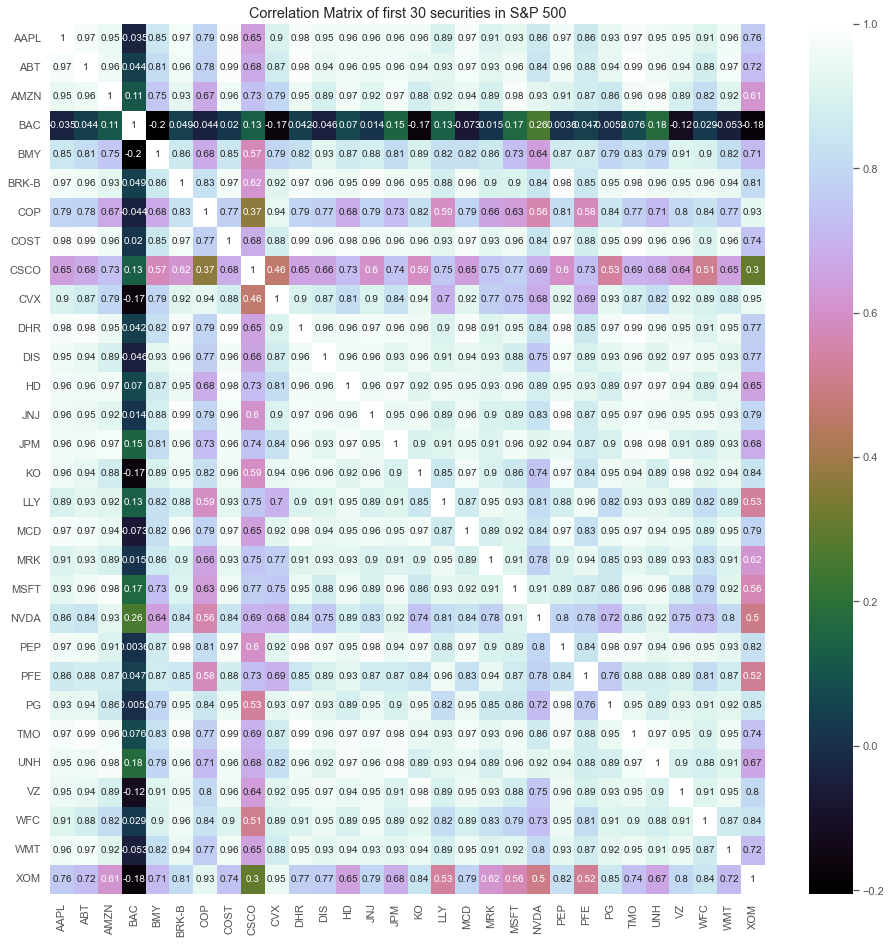

In [101]:
corr = SPY_table.corr()

plt.figure(figsize = (16,16)
          )

plt.title("Correlation Matrix of first 30 securities in S&P 500")

sns.heatmap(corr,
            annot = True,
            cmap = "cubehelix")

## Calculation of Daily Linear Return

In [102]:
daily_linear_returns = SPY_table.pct_change(1)

In [103]:
daily_linear_returns = \
    daily_linear_returns[ \
         daily_linear_returns.apply(lambda x:(x - x.mean()
                                             ).abs() < (3 * x.std()
                                                       )
                                   ).all(1)
                        ]

In [104]:
daily_linear_returns

,AAPL,ABT,AMZN,BAC,BMY,BRK-B,COP,COST,CSCO,CVX,...,NVDA,PEP,PFE,PG,TMO,UNH,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.051151,-0.014184,-0.035230,-0.021277,-0.013837,-0.018753,-0.001389,-0.035526,-0.030165,-0.009247,...,-0.040463,-0.003390,-0.012704,0.015634,0.008547,0.002075,-0.009349,-0.016502,-0.014870,0.002986
2000-01-14,0.038114,0.022222,-0.025592,0.061762,0.027725,-0.033523,-0.008498,0.033575,0.012949,-0.006424,...,0.043027,0.006956,0.000000,0.017391,-0.016806,-0.001013,0.013498,0.030912,-0.009597,-0.019752
2000-01-20,0.065103,-0.030246,-0.030870,-0.019206,-0.034146,-0.005266,-0.028369,-0.036145,0.000557,-0.004975,...,-0.002756,-0.008577,-0.016470,-0.024377,0.017544,0.025210,0.003254,-0.010205,-0.010732,-0.021914
2000-02-02,-0.014340,0.005704,0.029657,-0.025510,0.002902,-0.020896,-0.013825,0.039759,-0.033422,-0.006762,...,0.028006,-0.029411,-0.027028,-0.008795,-0.017667,0.026406,-0.004197,-0.030273,-0.005325,0.007514
2000-02-04,0.045372,0.035714,-0.066815,-0.012113,-0.010516,-0.008982,-0.009523,-0.021914,0.028117,-0.035303,...,0.023659,-0.009452,0.003509,-0.031310,-0.007117,0.024831,0.002139,-0.008038,-0.035332,-0.018209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000951,-0.000802,-0.002114,0.001422,-0.000791,-0.000044,0.001084,0.003137,-0.006653,0.000083,...,-0.000837,-0.001095,-0.000763,0.002562,-0.004664,-0.001864,-0.001954,0.000186,0.004033,-0.003841
2019-12-26,0.019840,0.000000,0.044467,0.008518,0.012666,0.004346,0.005103,0.005098,0.001465,0.002161,...,0.002389,-0.001461,0.002291,0.000000,-0.002450,0.003768,0.000163,0.006132,0.000084,0.001571
2019-12-27,-0.000380,0.001375,0.000551,-0.004786,0.002814,-0.001369,-0.000308,-0.005478,-0.001672,-0.002487,...,-0.009699,0.006219,-0.001523,0.006948,0.002579,0.001082,0.003916,-0.004247,0.000586,-0.003422


## Scaling S&P 500 data
* Scaling is a technique to make the data points generalized so that the distance between them is lower 
* it transforms attributes to a standard Normal distribution with a mean of 0 and a standard deviation of 1
* By scaling the data it makes it easy for the model to learn and understand the problem
* A standardized dataset improves the prediction accuracy of the algorithm compared to an unstandardized one

In [105]:
scaler = StandardScaler().fit(daily_linear_returns)

In [106]:
scaled_SPY = pd.DataFrame(scaler.fit_transform(daily_linear_returns),
                          columns = daily_linear_returns.columns,
                          index = daily_linear_returns.index)

In [107]:
daily_linear_returns.dropna(how = "any",
                            inplace = True)

scaled_SPY.dropna(how = "any",
                  inplace = True)

scaled_SPY

,AAPL,ABT,AMZN,BAC,BMY,BRK-B,COP,COST,CSCO,CVX,...,NVDA,PEP,PFE,PG,TMO,UNH,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-2.764484,-1.301962,-1.699568,-1.229743,-1.136092,-1.897041,-0.140937,-2.890429,-1.892490,-0.798840,...,-1.570119,-0.437225,-1.118312,1.689837,0.565583,0.081544,-0.848506,-1.150433,-1.416410,0.219298
2000-01-14,1.931313,1.897309,-1.245466,3.518449,2.118419,-3.360202,-0.605427,2.608786,0.761698,-0.572878,...,1.549834,0.734627,-0.023046,1.886239,-1.313207,-0.132000,1.142967,2.115470,-0.920030,-1.726431
2000-01-20,3.351085,-2.713410,-1.494127,-1.111326,-2.726385,-0.560912,-1.903672,-2.939629,-0.001207,-0.456922,...,-0.161038,-1.024619,-1.442983,-2.781120,1.232284,1.681253,0.249991,-0.716668,-1.026817,-1.911455
2000-02-02,-0.828016,0.445760,1.357679,-1.471811,0.174671,-2.109263,-0.953451,3.100962,-2.092993,-0.599943,...,0.988514,-3.384394,-2.353246,-1.039888,-1.377007,1.763986,-0.399500,-2.098973,-0.517845,0.606749
2000-02-04,2.313158,3.082942,-3.187727,-0.705753,-0.876020,-0.929034,-0.672417,-1.807144,1.695480,-2.884381,...,0.826053,-1.123799,0.279462,-3.555815,-0.595191,1.655058,0.152848,-0.567437,-3.342637,-1.594433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,-0.023660,-0.125917,-0.139242,0.068184,-0.114501,-0.043591,0.020570,0.186465,-0.445043,-0.052072,...,-0.089347,-0.177206,-0.088849,0.229167,-0.413400,-0.190805,-0.203989,-0.000951,0.363035,-0.364925
2019-12-26,0.970048,-0.055482,2.055444,0.473945,0.939267,0.391391,0.283164,0.342541,0.054725,0.114214,...,0.031213,-0.218713,0.174446,-0.057130,-0.249349,0.198644,-0.019406,0.408588,-0.008700,0.098233
2019-12-27,-0.093639,0.065361,-0.013682,-0.286780,0.167807,-0.174818,-0.070319,-0.499103,-0.138391,-0.257820,...,-0.420512,0.651075,-0.154382,0.719249,0.123317,0.012916,0.307685,-0.306328,0.038560,-0.329064


In [108]:
scaled_SPY.dtypes

AAPL     float64
ABT      float64
AMZN     float64
BAC      float64
BMY      float64
BRK-B    float64
COP      float64
COST     float64
CSCO     float64
CVX      float64
DHR      float64
DIS      float64
HD       float64
JNJ      float64
JPM      float64
KO       float64
LLY      float64
MCD      float64
MRK      float64
MSFT     float64
NVDA     float64
PEP      float64
PFE      float64
PG       float64
TMO      float64
UNH      float64
VZ       float64
WFC      float64
WMT      float64
XOM      float64
dtype: object

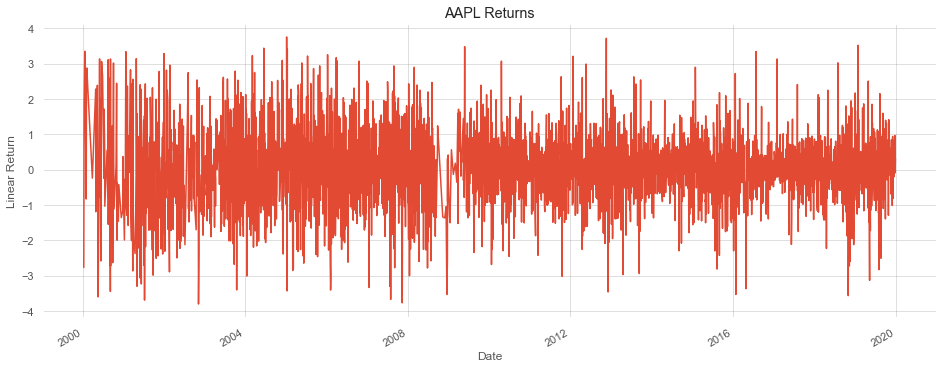

In [109]:
plt.figure(figsize = (16, 6)
           )

plt.title("AAPL Returns")

plt.ylabel("Linear Return")

scaled_SPY.AAPL.plot()

plt.show()

## Data Splitting
* Splitting the dataset into training set 80% and testing set 20%

In [110]:
prop = int(len(scaled_SPY) * 0.80)

X_Train = scaled_SPY[:prop]

X_Test = scaled_SPY[prop:]

X_Train_Raw = daily_linear_returns[:prop]

X_Test_Raw = daily_linear_returns[prop:]

In [111]:
stock_tickers = scaled_SPY.columns.values

In [112]:
n_tickers = len(stock_tickers)

## Applying Principle Component Analysis

In [113]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

## First Principal Component/ Eigenvector

In [114]:
pca.components_[0]

array([-0.15 , -0.172, -0.152, -0.202, -0.171, -0.166, -0.162, -0.174,
       -0.192, -0.194, -0.214, -0.205, -0.196, -0.183, -0.232, -0.175,
       -0.184, -0.149, -0.188, -0.194, -0.144, -0.169, -0.202, -0.175,
       -0.194, -0.146, -0.168, -0.216, -0.168, -0.202])

## Explained Variance
* Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the `principal components (eigenvectors)` generated by the principal component analysis (PCA) method.
* it refers to the amount of variability in a data set that can be attributed to each individual principal component, how much of the total variance is explained by each component
* The higher the explained variance would be better as it tells us that the model is doing a better job in predicting the optimal portfolio

In [115]:
NumEigenvalues = 10

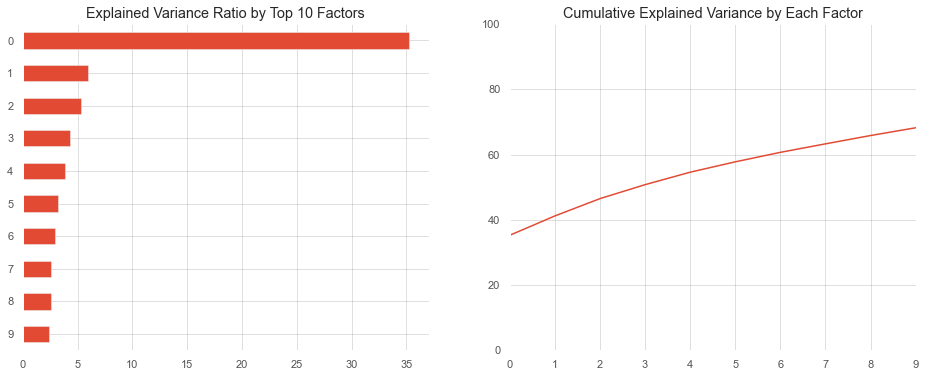

In [116]:
fig, axes = plt.subplots(ncols = 2,
                         figsize = (16, 6)
                         )

Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).sort_values() * 100

Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).cumsum()*100

Series1.plot.barh(ylim = (0, 9),
                  title = "Explained Variance Ratio by Top 10 Factors",
                  ax = axes[0]
                  );

Series2.plot(ylim = (0, 100),
             xlim = (0, 9),
             ax = axes[1],
             title = "Cumulative Explained Variance by Each Factor");

In [117]:
pd.Series(np.cumsum(pca.explained_variance_ratio_)
          ).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)
# the first PC will explain 35.28% and together with the second PC it will explain 41.20 % of the data. 
# its a cumulative sum of the entire explained variance

,Explained Variance
0,35.28%
1,41.20%
2,46.50%
3,50.78%
4,54.61%
5,57.78%
6,60.69%
7,63.29%
8,65.85%
9,68.22%


## Portfolio Weights

In [118]:
def PCWeights():
    """
    Principal Components Weights
    """
    weights = pd.DataFrame()
    
    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                   )
        
    weights = weights.values.T
    return weights

weights = PCWeights()

In [119]:
weights.shape

(30, 30)

In [120]:
weights[0]

array([0.028, 0.032, 0.028, 0.037, 0.031, 0.03 , 0.03 , 0.032, 0.035,
       0.036, 0.039, 0.038, 0.036, 0.034, 0.043, 0.032, 0.034, 0.027,
       0.035, 0.036, 0.026, 0.031, 0.037, 0.032, 0.036, 0.027, 0.031,
       0.04 , 0.031, 0.037])

In [121]:
weights[4]

array([-26.046, -44.452, -18.148,   5.611, -74.346,   6.609,   8.046,
        52.348, -24.299,  12.551,   1.993,   2.344,  39.545, -17.955,
         2.665,  69.315, -54.93 ,  45.207, -62.286,  -6.31 , -47.823,
        70.528, -62.267,  60.988, -35.764, -38.608,  38.238,  13.333,
        63.766,  21.148])

array([[<AxesSubplot:title={'center':'Portfolio 0'}>],
       [<AxesSubplot:title={'center':'Portfolio 1'}>],
       [<AxesSubplot:title={'center':'Portfolio 2'}>],
       [<AxesSubplot:title={'center':'Portfolio 3'}>],
       [<AxesSubplot:title={'center':'Portfolio 4'}>]], dtype=object)

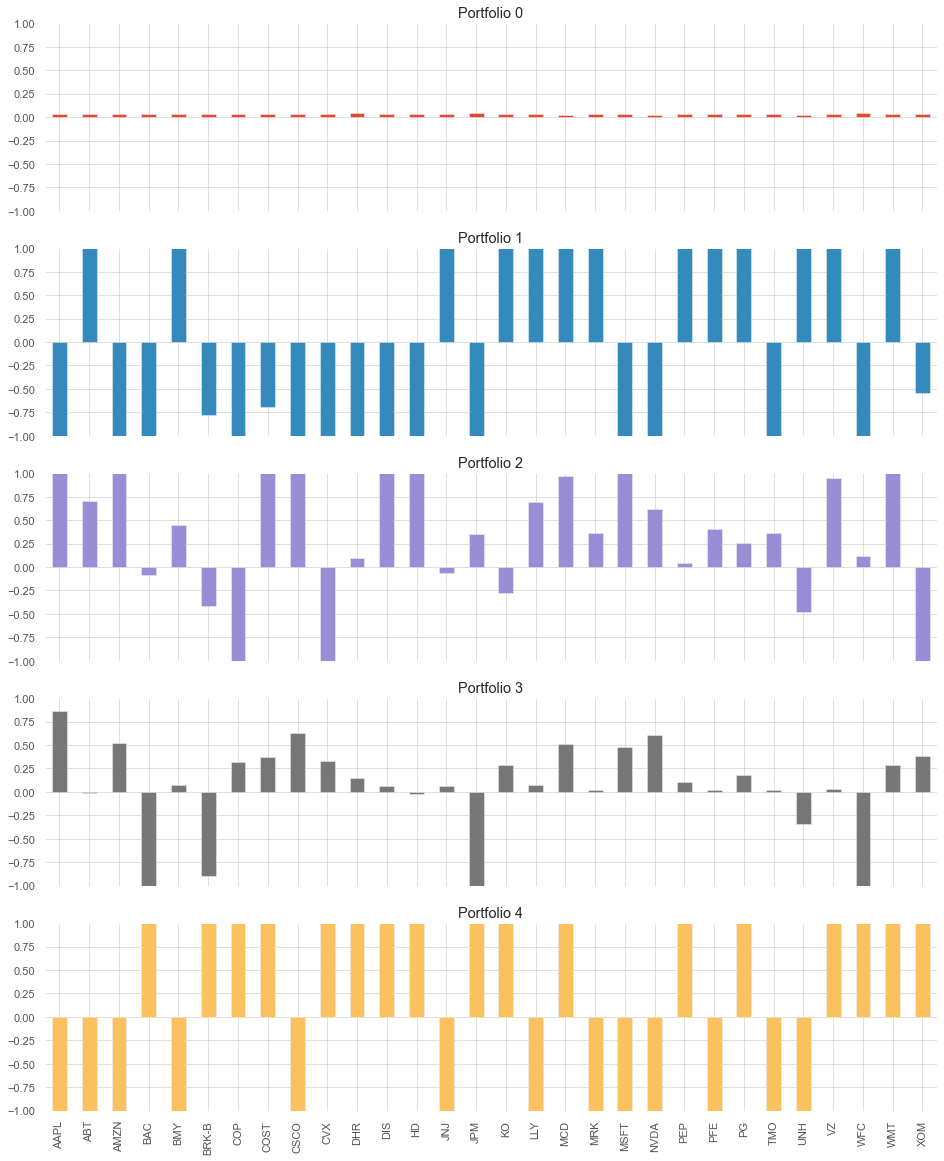

In [122]:
NumComponents = 5

topPortfolios = pd.DataFrame(pca.components_[:NumComponents],
                             columns = SPY_table.columns)

eigen_portfolios = topPortfolios.div(topPortfolios.sum(1), axis = 0)

eigen_portfolios.index = [f"Portfolio {i}" for i in range( NumComponents)
                          ]

np.sqrt(pca.explained_variance_)

eigen_portfolios.T.plot.bar(subplots = True,
                            layout = (int(NumComponents), 1),
                            legend = False,
                            sharey = True,
                            ylim = (-1, 1),
                            figsize = (16, 20)
                           )
# gives us the allocation of weights of each stock for each eigenportfolio generated by the principal component

## Finding the best Eigen Portfolio

In [123]:
def sharpe_ratio(ts_returns, periods_per_year = 252):
    
    n_years = ts_returns.shape[0]/periods_per_year
    
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                 ) - 1
    
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    
    annualized_sharpe = annualized_return / annualized_vol
    
    return annualized_return, annualized_vol, annualized_sharpe
#We use the Sharpe ratio to determine the optimal eigen portfolio.
#Because the Sharpe ratio is an assessment of risk-adjusted performance, 
#it explains the annualized returns against the annualized volatility of a portfolio.

In [124]:
def FindOptimalPortfolio():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_SPY.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )

In [125]:
FindOptimalPortfolio()
# We construct a loop to calculate the weights of the principle components of each eigen portfolio 
# and then use the Sharpe ratio function to find the portfolio with the highest Sharpe ratio.

Our Eigen Portfolio #4 with the highest Sharpe. Return inf%, vol = 4129.21%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
      Return        Vol         Sharpe
4        inf  41.292062  1.797693e+308
0   0.125810   0.128538   9.787729e-01
3   0.167482   0.675532   2.479256e-01
11 -0.058361   1.413382  -4.129141e-02
13 -1.000000  17.505232  -5.712578e-02
27 -0.167528   1.138027  -1.472089e-01
22 -1.000000   6.490033  -1.540824e-01
26 -0.447785   2.094628  -2.137776e-01
23 -0.999995   4.144809  -2.412645e-01
9  -0.999227   3.826837  -2.611105e-01
15 -0.999391   3.811795  -2.621838e-01
24 -0.999037   3.755787  -2.659993e-01
8  -0.997239   3.391245  -2.940628e-01
17 -0.999096   3.369898  -2.964766e-01
14 -0.304337   1

In [126]:
# 1.Unrealistic weights
# 2.This assumes unlimited short selling and leverage
# 3.Frictionless market (A frictionless market is a theoretical trading environment
# where all costs and restraints associated with transactions are non-existent. 
# Which means no trading fees, no execution risk, and unrealistic Supply and Demand 
# (which means if there is high demand for a certain stock, then the stock price will be high). 
##( check with stephen on supply and demand explaination)


![Wolf of Wall Street Clip - Money Throwing Off Yacht](https://i.makeagif.com/media/7-11-2015/lbFRj6.gif)

In [127]:
weights = PCWeights()

portfolio = pd.DataFrame()

def VisualizeEigen(weights,
                   plot = False,
                   portfolio = portfolio):
    
    portfolio = pd.DataFrame(data = {"weights": weights.squeeze()*100},
                             index = stock_tickers)
    
    portfolio.sort_values(by = ["weights"],
                          ascending = False,
                          inplace = True)
    
    if plot:
        
        print("Total weights of our Eigen-Portfolio: %2.f" % np.sum(portfolio)
             )
        
        portfolio.plot(figsize = (14, 10),
                       title = "Eigen-Portfolio Weights",
                       rot = 60,
                       xticks = range(0, len(stock_tickers), 1)
                      )
        
        plt.show()
        
    return portfolio

In [128]:
weights[4].sum()

0.999999999999936

Total weights of our Eigen-Portfolio: 100


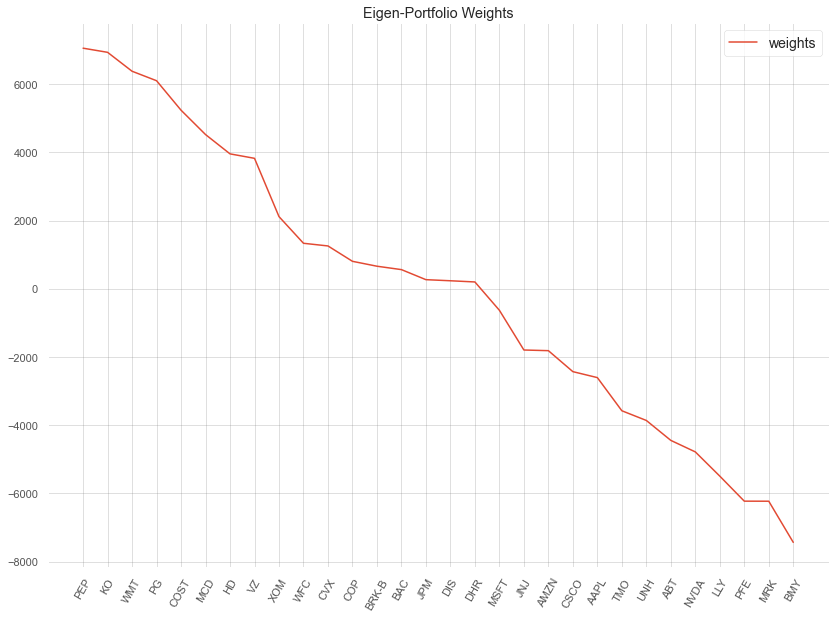

,weights
PEP,7052.776065
KO,6931.488512
WMT,6376.602233
PG,6098.819647
COST,5234.783315
MCD,4520.716078
HD,3954.510893
VZ,3823.783870
XOM,2114.770663
WFC,1333.277356


In [129]:
VisualizeEigen(weights = weights[4],
               plot = True)
# For those components in our portfolio that are positive (long/buy)
# For those components in our portfolio that are negative (short/sell)

### How we get this infinite return

In [130]:
X_Test_Raw

,AAPL,ABT,AMZN,BAC,BMY,BRK-B,COP,COST,CSCO,CVX,...,NVDA,PEP,PFE,PG,TMO,UNH,VZ,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-17,-0.022758,-0.002933,-0.015498,0.006762,-0.014778,-0.008874,0.022938,-0.003388,0.002771,0.004947,...,-0.017455,-0.004237,-0.015252,-0.003357,-0.006724,-0.006995,0.005986,-0.005336,-0.004909,-0.005481
2016-06-20,-0.002413,0.009628,0.010787,0.010448,0.004104,0.006679,0.012231,0.003785,-0.005181,0.010239,...,0.017979,-0.000387,0.008182,-0.001083,0.014565,0.006028,-0.000372,0.007082,0.002114,0.004409
2016-06-21,0.008518,-0.000530,0.002535,0.005908,0.004087,0.013129,0.002461,0.004601,-0.001042,0.006140,...,-0.006098,0.006868,0.007246,0.004456,0.003639,-0.002382,0.006324,0.006392,0.005063,0.004499
2016-06-22,-0.003754,0.026769,-0.007292,-0.000734,0.014877,0.002857,-0.018080,0.005852,-0.001738,-0.009202,...,-0.000846,-0.003267,-0.008058,0.001918,0.006313,-0.002099,-0.001294,-0.005505,0.004058,-0.003933
2016-06-23,0.005756,0.022973,0.016155,0.031595,0.004564,0.014173,0.037281,-0.006894,0.017410,0.021019,...,0.026678,0.006748,0.003481,0.007658,0.015282,0.009355,0.011845,0.020013,0.004878,0.006910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.000951,-0.000802,-0.002114,0.001422,-0.000791,-0.000044,0.001084,0.003137,-0.006653,0.000083,...,-0.000837,-0.001095,-0.000763,0.002562,-0.004664,-0.001864,-0.001954,0.000186,0.004033,-0.003841
2019-12-26,0.019840,0.000000,0.044467,0.008518,0.012666,0.004346,0.005103,0.005098,0.001465,0.002161,...,0.002389,-0.001461,0.002291,0.000000,-0.002450,0.003768,0.000163,0.006132,0.000084,0.001571
2019-12-27,-0.000380,0.001375,0.000551,-0.004786,0.002814,-0.001369,-0.000308,-0.005478,-0.001672,-0.002487,...,-0.009699,0.006219,-0.001523,0.006948,0.002579,0.001082,0.003916,-0.004247,0.000586,-0.003422


In [131]:
(X_Test_Raw * weights[4]).sum(1) # daily returns of portfolio 4

Date
2016-06-17    4.901481
2016-06-20   -1.218895
2016-06-21    1.554660
2016-06-22   -4.108253
2016-06-23   -2.776352
                ...   
2019-12-24    1.382314
2019-12-26   -1.624914
2019-12-27    1.010562
2019-12-30    0.949723
2019-12-31   -1.544310
Length: 804, dtype: float64

In [132]:
((X_Test_Raw * weights[4]).sum(1) + 1) # we add 1 to facilitate cumulative sum 
# if you notice, some of the daily returns are still negative despite us adding 1
# so if we take the cumsum of the daily returns, the cumsum() will just "ignore" big negative numbers

Date
2016-06-17    5.901481
2016-06-20   -0.218895
2016-06-21    2.554660
2016-06-22   -3.108253
2016-06-23   -1.776352
                ...   
2019-12-24    2.382314
2019-12-26   -0.624914
2019-12-27    2.010562
2019-12-30    1.949723
2019-12-31   -0.544310
Length: 804, dtype: float64

In [133]:
np.log((X_Test_Raw * weights[4]).sum(1) + 1).cumsum() # this is why when we take np.log of a negative number
# we get NaN value

Date
2016-06-17      1.775203
2016-06-20           NaN
2016-06-21      2.713122
2016-06-22           NaN
2016-06-23           NaN
                 ...    
2019-12-24    278.746491
2019-12-26           NaN
2019-12-27    279.444906
2019-12-30    280.112593
2019-12-31           NaN
Length: 804, dtype: float64

In [134]:
np.log((X_Test_Raw * weights[4]).sum(1) + 1).cumsum().apply(np.exp) # by taking and exponent of a very large number
# huge negative losses will be "bought" out by external parties and huge returns will be retained by us 
# This brings an anology that we will get "infinite" returns, because we assume someone will always bail us out
# when we make huge negative returns

Date
2016-06-17     5.901481e+00
2016-06-20              NaN
2016-06-21     1.507628e+01
2016-06-22              NaN
2016-06-23              NaN
                  ...      
2019-12-24    1.143044e+121
2019-12-26              NaN
2019-12-27    2.298161e+121
2019-12-30    4.480778e+121
2019-12-31              NaN
Length: 804, dtype: float64

## Backtesting Eigenportfolio

In [135]:
market_cap = np.array([7.00247, 5.661367, 3.23222, 1.613549, 1.545701, 1.407155, 1.37588, 1.039418, 0.978709, 0.970535, 0.964586,
             0.942017, 0.848777, 0.78553, 0.780785, 0.760121, 0.718693, 0.704938, 0.672549, 0.648896, 0.611694, 0.588815,
             0.582157, 0.571562, 0.546428, 0.545565, 0.521501, 0.506913, 0.495937, 0.490235])*(1/30)
market_normalize = market_cap
market_normalize
# the script that prof Roh went through in class is the dow jones index which is equally weighted
# for this problem set we are dealing with the S&P 500 index which is market cap weighted

array([0.233, 0.189, 0.108, 0.054, 0.052, 0.047, 0.046, 0.035, 0.033,
       0.032, 0.032, 0.031, 0.028, 0.026, 0.026, 0.025, 0.024, 0.023,
       0.022, 0.022, 0.02 , 0.02 , 0.019, 0.019, 0.018, 0.018, 0.017,
       0.017, 0.017, 0.016])

In [136]:
def Backtest(eigen):
    
    eigen_prtfi = pd.DataFrame(data = {"weights": eigen.squeeze()},
                               index = stock_tickers)
    
    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)
    
    eigen_prti_returns = np.dot(X_Test_Raw.loc[:, eigen_prtfi.index], eigen)
    
    eigen_portfolio_returns = pd.Series(eigen_prti_returns.squeeze(),
                                        index = X_Test_Raw.index)
    
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    
    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f" % 
          (returns*100, vol*100, sharpe)
         )
        
    equal_weight_return = (X_Test_Raw * (1 / len(pca.components_)
                                         )
                           ).sum(axis = 1)
    return equal_weight_return, eigen_portfolio_returns
# we will be using this backtest function to run our testing dataset
# to test the eigen portfolios against the market index

In [137]:
# Market Cap weights
print("Market Cap weights") 
(equal_weight_return, eigen_portfolio_returns_market) = Backtest(eigen = market_normalize)
# Porfolio 0
print("\nPorfolio 0")
(equal_weight_return, eigen_portfolio_returns_p0) = Backtest(eigen = weights[0])
# Porfolio 3
print("\nPorfolio 3")
(equal_weight_return, eigen_portfolio_returns_p3) = Backtest(eigen = weights[3])

Market Cap weights
Our PCA-based Portfolio:
Return = 47.25%
Volatility = 15.52%
Sharpe = 3.04

Porfolio 0
Our PCA-based Portfolio:
Return = 28.65%
Volatility = 10.38%
Sharpe = 2.76

Porfolio 3
Our PCA-based Portfolio:
Return = -7.64%
Volatility = 45.15%
Sharpe = -0.17


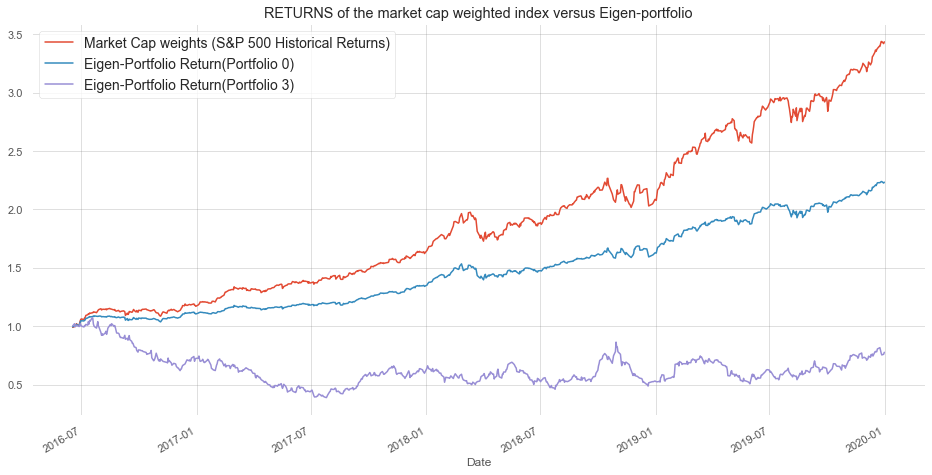

In [138]:
# Plot
df_plot = pd.DataFrame({
                        "Market Cap weights (S&P 500 Historical Returns)": eigen_portfolio_returns_market,
                        "Eigen-Portfolio Return(Portfolio 0)": eigen_portfolio_returns_p0,
                        "Eigen-Portfolio Return(Portfolio 3)": eigen_portfolio_returns_p3},
                       index = X_Test.index)
    
np.cumprod(df_plot + 1).plot(title = "RETURNS of the market cap weighted index versus Eigen-portfolio",
                                 figsize = (16, 8)
                                )
plt.show()
# the market cap weights is dervied by manually normalizing the 30 components in our portfolio
# if you see closely the first principal component eigen portfolio trend mimics the variance of the market cap weights
# the first principal component can be seen behaving like the market

In [139]:
# The red line shows the historical returns for the past 5 years,
#which is upwards sloping. The Eigen portfolio which is equally weighted will 
# therefore be unable to outperform the market.
#However, the trend of s&p 500 remaining in a upwards trajectory for the next 5 years 
#may change due to policy changes such as low interest rate by the Federal Reserve. 
#Hence, the equally weighted portfolio may actually have a chance to outperform the 
#market portfolio given a change in market regime. 